July 4, 2023

This notebook points at LHCb data to be analyzed as part of the University of Cincinnati
QuarkNet Summer Intern program.  The data is not meant to be public, so please do not
share this notebook or the url pointing at the data outside the UC-LHCb group.

The decay channel to be studied is $ B^+ \to \bar \Lambda^0 p K^+ K^- $ and its charge
conjugate decay $ B^- \to \Lambda^0 \bar p K^- K^+ $.


    [comments by Mike Sokoloff]

Here, we are importing Python packages that will be used for analyzing the data.

* uproot reads ROOT files and puts the data into awkward arrays
* numpy is a library that manipulates arrays transparently
* matplotlib is a library for plotting
* vector is library for manipulating four-vectors that collaborates with awkard arrays
* awkward is a library like numpy, but it allows use of jagged arrays, not only uniformly formmated arrays
* iMinuit is a Jupyter-friendly interface for the Minuit2 C++ fitting library, the standard fitting package used in particle physics (see https://github.com/scikit-hep/iminuit)

If your environment does not already have these Python packages, you may need to execute the command

* pip install package_name

In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import vector  ## added by mds
import awkward as ak

import iminuit
from iminuit import Minuit
from fit_classes import *
from utils import *

To keep the directory with notebooks clean, it is useful to define a subdirectory to store 
plots that are save to files.  I executed

  &nbsp;&nbsp;&nbsp;&nbsp; mkdir Bp_to_L0pKK_plots
  
from my notebooks directory



In [2]:
plots_dir = './Bp_to_L0pKK_plots/'

explain the most interesting variables in the ntuples

In [3]:
##  read in a single file and process as done to see the structure and contents of the file

# Open the root file using uproot. If you are working on a UC server, use the file in /share/lazy
# If you are working on any other machine (including Google's Colab), use the file accessed using http.

f = uproot.open('/share/lazy/sokoloff/B_to_L0phh/B2L0pbarKmKp_QNet.root')
#f = uproot.open('http://charmphysics.com/QNet-2023/B2L0pbarKmKp_QNet.root')
print(*f.keys(), sep='\n')
print(" ---------")
print("       ")
                

# Get the TTree from the file.
t = f['DecayTree']
##  t.show()
# Load the branches of the TTree into a pandas dataframe.

# You could also use library='np' to load these into numpy arrays
pArray = ak.to_dataframe(t.arrays(library="ak"))

##pArray = t.arrays(library='pd')

for col in pArray.columns:
    print(col)


##print('arrs = ',arrs)

DecayTree;1
 ---------
       
Bu_MM
h1_P
h1_PT
h1_PE
h1_PX
h1_PY
h1_PZ
h1_ID
h1_TRACK_Type
h2_P
h2_PT
h2_PE
h2_PX
h2_PY
h2_PZ
h2_ID
h2_TRACK_Type
p_P
p_PT
p_PE
p_PX
p_PY
p_PZ
p_ID
p_TRACK_Type
Lp_P
Lp_PT
Lp_PE
Lp_PX
Lp_PY
Lp_PZ
Lp_ID
Lp_TRACK_Type
L0_P
L0_PT
L0_PE
L0_PX
L0_PY
L0_PZ
L0_ID
Lpi_P
Lpi_PT
Lpi_PE
Lpi_PX
Lpi_PY
Lpi_PZ
Lpi_ID
Lpi_TRACK_Type
p_MC15TuneV1_ProbNNp
Lpi_MC15TuneV1_ProbNNpi
Lp_MC15TuneV1_ProbNNp
h1_MC15TuneV1_ProbNNk
h2_MC15TuneV1_ProbNNk
Bu_FDCHI2_OWNPV
Bu_IPCHI2_OWNPV
Bu_ENDVERTEX_X
Bu_ENDVERTEX_Y
Bu_ENDVERTEX_Z
Bu_ENDVERTEX_XERR
Bu_ENDVERTEX_YERR
Bu_ENDVERTEX_ZERR
L0_ENDVERTEX_X
L0_ENDVERTEX_Y
L0_ENDVERTEX_Z
L0_ENDVERTEX_XERR
L0_ENDVERTEX_YERR
L0_ENDVERTEX_ZERR
L0_MM
L0_DOCA12


In [4]:
## As in the cell above, the data can be accessed from the file on /share/lazy or from the web via http

file_list = ['/share/lazy/sokoloff/B_to_L0phh/B2L0pbarKmKp_QNet.root:DecayTree']
#file_list = ['http://charmphysics.com/QNet-2023/B2L0pbarKmKp_QNet.root:DecayTree']

The following cell reads in the data from all the files in file_list.  In this case, there is only a single file.  For more general use, the method below is preferred.

In [5]:
arrs = uproot.concatenate(file_list)
        

To get started, we will look at the stripping level data.

Notice that the argument of the plt.hist(...) method is arrs['Bu_MM'].  Later, we will use "local" arrays extracted from the awkward array filled in the cell above.

As is always good practice, the plot has a title, a level on the horizontal axis and on the vertical axis. The label on the vertical axis explicitly note the bin size.

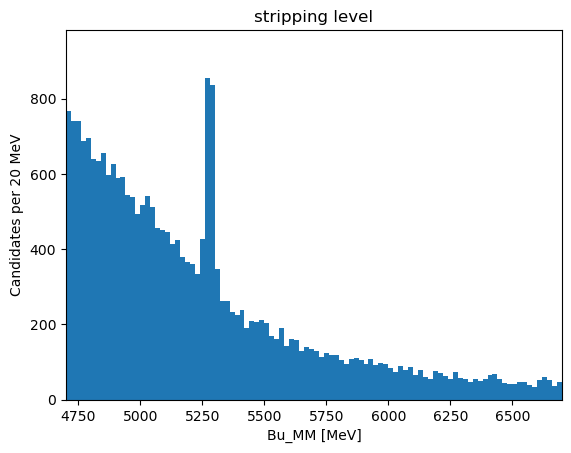

In [6]:

plt.figure()
nC, bins, patches = plt.hist(arrs['Bu_MM'], bins=100, range=(4700,6700))
plt.title('stripping level')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('Candidates per 20 MeV')
plt.axis([4700,6700,0,1.15*max(nC)])
plt.show()


To better understand the command

  &nbsp;&nbsp;&nbsp; nC, bins, patches = plt.hist(arrs['Bu_MM'], bins=100, range=(4700,6700))
  
  in the cell above, let explicitly print out
  * nC
  * bins
  * patches
  
As in clear from the results of printing, nC is the number of counts in each bin, bins is an array with all the bin edges (so one more entry than the number of bins), and patches is some sort of object used by matplotlib.pyplot to represent the plot image.

In [7]:
print('bins = ',bins)
print('nC   = ',nC)
print('patches = ',patches)

bins =  [4700. 4720. 4740. 4760. 4780. 4800. 4820. 4840. 4860. 4880. 4900. 4920.
 4940. 4960. 4980. 5000. 5020. 5040. 5060. 5080. 5100. 5120. 5140. 5160.
 5180. 5200. 5220. 5240. 5260. 5280. 5300. 5320. 5340. 5360. 5380. 5400.
 5420. 5440. 5460. 5480. 5500. 5520. 5540. 5560. 5580. 5600. 5620. 5640.
 5660. 5680. 5700. 5720. 5740. 5760. 5780. 5800. 5820. 5840. 5860. 5880.
 5900. 5920. 5940. 5960. 5980. 6000. 6020. 6040. 6060. 6080. 6100. 6120.
 6140. 6160. 6180. 6200. 6220. 6240. 6260. 6280. 6300. 6320. 6340. 6360.
 6380. 6400. 6420. 6440. 6460. 6480. 6500. 6520. 6540. 6560. 6580. 6600.
 6620. 6640. 6660. 6680. 6700.]
nC   =  [766. 741. 740. 688. 695. 640. 633. 654. 598. 626. 589. 592. 543. 539.
 493. 518. 542. 513. 456. 451. 445. 413. 423. 379. 366. 361. 333. 427.
 854. 835. 346. 262. 263. 232. 225. 238. 190. 210. 205. 211. 204. 170.
 161. 189. 143. 162. 158. 128. 139. 134. 130. 112. 125. 118. 119. 105.
  95. 109. 110. 104.  94. 109.  91.  96.  95.  85.  74.  90.  78.  86.
  65.  79.  5

We want to create awkward arrays for individual columns in arrs so the names are easier to use.  For example, h1_P will be a one-dimensional awkward array with the same contents as the 'h1_P' column of the two-dimensional arrs awkward array.

In [8]:
## K+ in B+ --> Lambda_bar,p,K+,K-  or the K- in B- --> Lambda,pbar,K-,K+

h1_P   = arrs['h1_P']
h1_PT  = arrs['h1_PT']
h1_PE  = arrs['h1_PE']
h1_PX  = arrs['h1_PX']
h1_PY  = arrs['h1_PY']
h1_PZ  = arrs['h1_PZ']
h1_ID  = arrs["h1_ID"]
h1_TRACK_Type = arrs["h1_TRACK_Type"]

Use print statements to do a sanity check that the code in the cell above does what is expected

In [9]:
print("arrs['h1_P'] = ",arrs['h1_P'])
print('h1_P = ',h1_P)

arrs['h1_P'] =  [1.17e+05, 1.85e+04, 2.13e+04, 7.17e+04, ..., 2.57e+04, 3.63e+04, 1.1e+05]
h1_P =  [1.17e+05, 1.85e+04, 2.13e+04, 7.17e+04, ..., 2.57e+04, 3.63e+04, 1.1e+05]


check the type of the h1_P array that was just produced; as arrs[...] is an awkward array,
it is not suprising that h1_P is also an awkward array

In [10]:
print("type(h1_P) = ", type(h1_P))

type(h1_P) =  <class 'awkward.highlevel.Array'>


In [11]:
## h2_XXX is the K- in B+ --> Lambda_bar,p,K+,K-

h2_P   = arrs['h2_P']
h2_PT  = arrs['h2_PT']
h2_PE  = arrs['h2_PE']
h2_PX  = arrs['h2_PX']
h2_PY  = arrs['h2_PY']
h2_PZ  = arrs['h2_PZ']
h2_ID  = arrs["h2_ID"]
h2_TRACK_Type = arrs["h2_TRACK_Type"]

In the cell below, do the same for p_P, p_PT, ... p_TRACK_Type as well.

In [12]:
## p in B+ --> Lambda_bar,p,K+,K-

p_P   = arrs['p_P']
p_PT  = arrs['p_PT']
p_PE  = arrs['p_PE']
p_PX  = arrs['p_PX']
p_PY  = arrs['p_PY']
p_PZ  = arrs['p_PZ']
p_ID  = arrs["p_ID"]
p_TRACK_Type = arrs["p_TRACK_Type"]

And the same for the proton in the Lambda: Lp_P, Lp_PT, ... Lp_TRACK_Type.

At the bottom of the cell we create two Boolean arrays, one for $ \Lambda \to p \pi $ 
candidates where both tracks are long tracks and one where both are downstream tracks.
See https://twiki.cern.ch/twiki/bin/view/LHCb/LHCbTrackingStrategies#Track_types and https://twiki.cern.ch/twiki/bin/view/LHCb/TupleToolTrackInfo for background. 

In [13]:
## proton in the Lambda_bar in B+ --> Lambda_bar,p,K+,K-

# begin inserting code
Lp_P   = arrs['Lp_P']
Lp_PT  = arrs['Lp_PT']
Lp_PE  = arrs['Lp_PE']
Lp_PX  = arrs['Lp_PX']
Lp_PY  = arrs['Lp_PY']
Lp_PZ  = arrs['Lp_PZ']
Lp_ID  = arrs["Lp_ID"]
Lp_TRACK_Type = arrs["Lp_TRACK_Type"]

# end inserting code

Lp_ProbNNp    = arrs['Lp_MC15TuneV1_ProbNNp']

## see https://twiki.cern.ch/twiki/bin/view/LHCb/TupleToolTrackInfo
## for definitions of LHCb track types
LL = (3 == Lp_TRACK_Type)
DD = (5 == Lp_TRACK_Type)



In the cell below,  print LL and DD to see what these Boolean arrays look like

In [14]:
## add print statements to this cell, one for LL and one for DD

print('LL - ',LL)
print("DD = ",DD)

LL -  [False, False, False, True, True, True, ..., True, True, False, True, False]
DD =  [True, True, True, False, False, False, ..., False, False, True, False, True]


Add the information for the pion in the $ \Lambda^0 \to p \pi $ decay: Lpi_P, Lpi_PT, ... Lpi_TRACK_Type.

If you are feeling up to it, add Boolean arrays to identify whether the $ \Lambda \to p \pi $ decays
are LL or DD depending only on the $ \pi $ track information (rather than the $ p $ track information).
How can you check that the results are always the same?

In [15]:
## pion in the Lambda_bar in B+ --> Lambda_bar,p,K+,K-

## add the information for the pions from Lambda --> p,pi decays here


Lpi_ProbNNpi   = arrs['Lpi_MC15TuneV1_ProbNNpi']



Create arrays L0_P, L0_PT, ... L0_ID following what was done for  h1_P, h1_PT, ... h1_ID above.  Note that there is no equivalent to h1_TRACK_Type as the $ \Lambda $ is a composite particle, not a single track.

Because the $ \Lambda $ is a composite particle, it has a "measured mass"; the code to add that array from the NTUPLE is already in the cell below.

In [16]:
## the Lambda_bar in B+ --> Lambda_bar,p,K+,K-

## add the arrays describing the Lambda kinematic quantities here
L0_P   = arrs['L0_P']
L0_PT  = arrs['L0_PT']
L0_PE  = arrs['L0_PE']
L0_PX  = arrs['L0_PX']
L0_PY  = arrs['L0_PY']
L0_PZ  = arrs['L0_PZ']
L0_ID  = arrs["L0_ID"]


## L0_MM is the "measured mass" taken from the NTUPLE.  It differs (a bit) from the mass calculated
## directly from its daughters' four-momenta as the algorithm varies the momenta so that the two momentum
## emerge from a common point in space
L0_MM  = arrs['L0_MM']


As a sanity check, the following cell prints out some elements of the Lp_, p_, h1_, and h2_ arrays.  The ID numbers are those assigned by the Particle Data Group (https://pdg.lbl.gov/2020/reviews/rpp2020-rev-monte-carlo-numbering.pdf). Positive numbers correspond to "particles" and negative numbers to the corresponding "antiparticles". The first element of each array refers to the first $ B^{\pm} $ candidate, the second element of each array to the second $ B^{\pm} $ candidate, etc. In this notebook we are using an NTUPLE with $ B^+ \to \bar \Lambda p K^+ K^- $, and charge conjugate, decays.

In [17]:
print("Lp_ID = ",Lp_ID)
print("p_ID = ",p_ID)
print("h1_ID = ",h1_ID)
print("h2_ID = ",h2_ID)


Lp_ID =  [-2212, 2212, 2212, -2212, -2212, 2212, ..., -2212, 2212, -2212, -2212, 2212]
p_ID =  [2212, -2212, -2212, 2212, 2212, -2212, ..., 2212, -2212, 2212, 2212, -2212]
h1_ID =  [321, -321, -321, 321, 321, -321, -321, ..., -321, 321, -321, 321, 321, -321]
h2_ID =  [-321, 321, 321, -321, -321, 321, 321, ..., 321, -321, 321, -321, -321, 321]


The variable Bu_FDCHI2_OWNPV corresponds to the "B flight distance $ \chi^2 $ with respect to its own primary vertex".  This is a measure of how far the $ B^{\pm} $ vertex position is from the primary interaction position in units of the corresponding uncertainty. If you're interested in studying this variable in signal and background regions, you might find that the distributions differ. 

In [18]:
Bu_FDCHI2_OWNPV = arrs['Bu_FDCHI2_OWNPV']

In [19]:
print('Bu_FDCHI2_OWNPV = ',Bu_FDCHI2_OWNPV)

Bu_FDCHI2_OWNPV =  [4.09e+03, 1.23e+03, 2.24e+03, 4.01e+04, ..., 2.25e+03, 2.08e+04, 4.7e+03, 671]


The variables in the cell below correspond to the nominal position of the $ \Lambda $ candidate vertex position and the corresponding uncertainties.

In [20]:
L0_ENDVERTEX_X    = arrs["L0_ENDVERTEX_X"]
L0_ENDVERTEX_Y    = arrs["L0_ENDVERTEX_Y"]
L0_ENDVERTEX_Z    = arrs["L0_ENDVERTEX_Z"]
L0_ENDVERTEX_XERR = arrs["L0_ENDVERTEX_XERR"]
L0_ENDVERTEX_YERR = arrs["L0_ENDVERTEX_YERR"]
L0_ENDVERTEX_ZERR = arrs["L0_ENDVERTEX_ZERR"]


The first six variables in the cell below correspond to the nominal position of the $ B^{\pm} $ candidate vertex position and the corresponding uncertainties, as for the $ \Lambda $ candidate in the cell above.

The variable Bu_IPCHI2_OWNPV (B impact parameter $ \chi^$ with respect to its own primary vertex) is a measure of how well the $ B^{\pm} $ candidate's momentum points from its vertex position to the primary vertex position in some sort of normalized units.  The details are complicated.  Real $ B^{\pm} $ decays tend to have smaller values of this variable than do random combinations of tracks of partially reconstructed $ B $ decays.

The variable $ Bu\_{MM} $ is the $ B $-candidate measured mass. It is taken from the NTUPLE. As for L0_MM, it has been calculated using some assumptions about the daughter tracks emerging from a common mother $ B $.

In [21]:
Bu_ENDVERTEX_X     = arrs["Bu_ENDVERTEX_X"]
Bu_ENDVERTEX_Y     = arrs["Bu_ENDVERTEX_Y"]
Bu_ENDVERTEX_Z     = arrs["Bu_ENDVERTEX_Z"]
Bu_ENDVERTEX_XERR  = arrs["Bu_ENDVERTEX_XERR"]
Bu_ENDVERTEX_YERR  = arrs["Bu_ENDVERTEX_YERR"]
Bu_ENDVERTEX_ZERR  = arrs["Bu_ENDVERTEX_YERR"]

Bu_IPCHI2_OWNPV    = arrs["Bu_IPCHI2_OWNPV"]
Bu_MM              = arrs['Bu_MM']


$ \Delta Z $, $ \Delta X $, and $ \Delta Y $ define the vector connecting the candidate $ B^{\pm} $ vertex position to the candidate $ \Lambda $ vertex position.

In [22]:
Delta_Z = L0_ENDVERTEX_Z - Bu_ENDVERTEX_Z
Delta_X = L0_ENDVERTEX_X - Bu_ENDVERTEX_X
Delta_Y = L0_ENDVERTEX_Y - Bu_ENDVERTEX_Y

In [23]:
print('type(Delta_Z) = ',type(Delta_Z))

type(Delta_Z) =  <class 'awkward.highlevel.Array'>


L0_FD_CHI2 is the $ \Lambda^0 $ flight distance $ \chi^2 $, a normalized $ \Lambda $-$ B $ vertex separation assuming the uncertainties in vertex positions in $ x $, $ y $, and $ z $ are uncorrelated. 


In [24]:
Delta_X_ERR = np.sqrt(np.square(Bu_ENDVERTEX_XERR)+np.square(L0_ENDVERTEX_XERR))
Delta_Y_ERR = np.sqrt(np.square(Bu_ENDVERTEX_YERR)+np.square(L0_ENDVERTEX_YERR))
Delta_Z_ERR = np.sqrt(np.square(Bu_ENDVERTEX_ZERR)+np.square(L0_ENDVERTEX_ZERR))

delta_x = np.divide(Delta_X,Delta_X_ERR)
delta_y = np.divide(Delta_Y,Delta_Y_ERR)
delta_z = np.divide(Delta_Z,Delta_Z_ERR)

L0_FD_CHISQ = np.square(delta_x) + np.square(delta_y) + np.square(delta_z)

In [25]:
## an example of how the "square" method in the numpy array squares each element of a numpy
## (or one-dimensional awkward) array

print('Delta_X_ERR    = ',Delta_X_ERR)
print('len(Delta_X_ERR) = ',len(Delta_X_ERR))
Delta_X_ERR_sq = np.square(Delta_X_ERR)
print('Delta_X_ERR_sq = ',Delta_X_ERR_sq)

Delta_X_ERR    =  [2.27, 1.44, 0.451, 0.0546, 0.127, ..., 0.036, 0.0326, 8.99, 0.198, 0.071]
len(Delta_X_ERR) =  26584
Delta_X_ERR_sq =  [5.16, 2.06, 0.204, 0.00298, 0.0162, ..., 0.00106, 80.9, 0.0391, 0.00504]


Interestingly, even though Delta_X_ERR_sq is produced by a numpy method, it is an awkward array.

In [26]:
print('type(Delta_Z_ERR) = ',type(Delta_Z_ERR))

type(Delta_Z_ERR) =  <class 'awkward.highlevel.Array'>


pName =  ./Bp_to_L0pKK_plots/L0bar_p_KK_Lp_ProbNNp.png


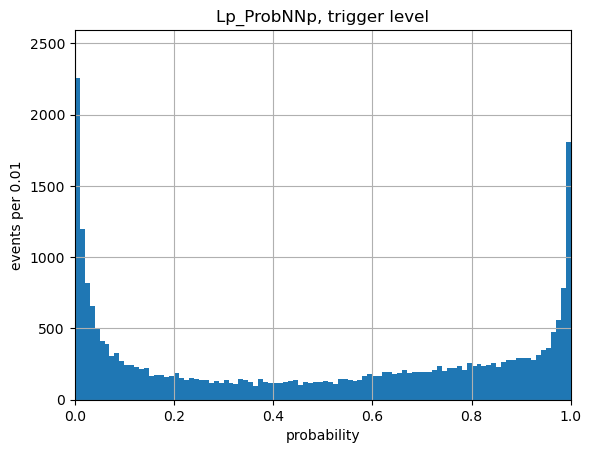

pName =  ./Bp_to_L0pKK_plots/L0bar_p_KK_Lp_LL_ProbNNp.png


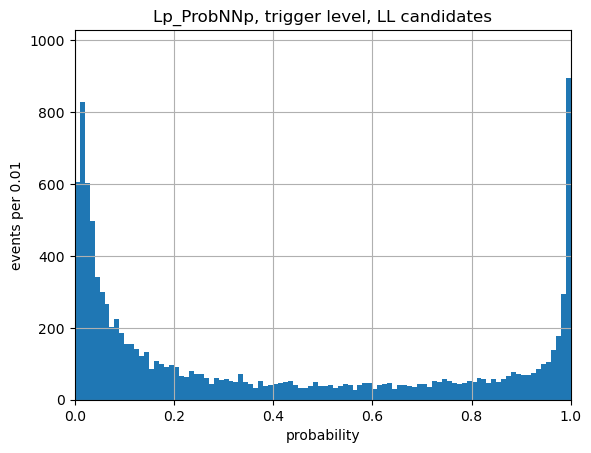

pName =  ./Bp_to_L0pKK_plots/L0bar_p_KK_Lp_DD_ProbNNp.png


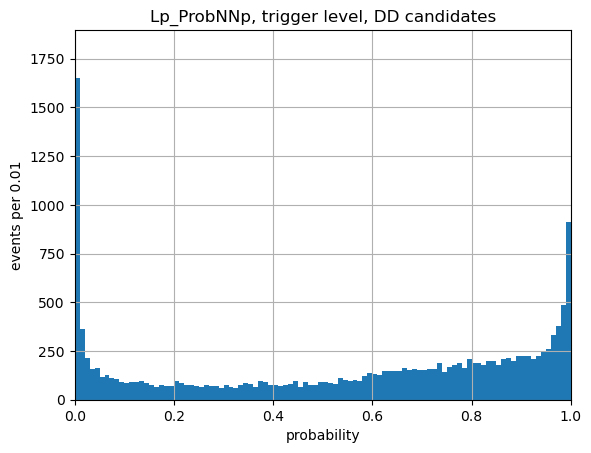

In [27]:
plt.figure()
plt.title("Lp_ProbNNp, trigger level")
nC, bins, patches = plt.hist(Lp_ProbNNp,bins=100,range=(0.,1.))
plt.xlabel("probability")
plt.ylabel("events per 0.01")
plt.axis([0.,1.,0,1.15*max(nC)])
plt.grid(True)
pName = plots_dir+"L0bar_p_KK_Lp_ProbNNp.png"
print("pName = ",pName)
plt.savefig(pName)
plt.show()

plt.figure()
plt.title("Lp_ProbNNp, trigger level, LL candidates")
nC, bins, patches = plt.hist(Lp_ProbNNp[LL],bins=100,range=(0.,1.))
plt.xlabel("probability")
plt.ylabel("events per 0.01")
plt.axis([0.,1.,0,1.15*max(nC)])
plt.grid(True)
pName = plots_dir+"L0bar_p_KK_Lp_LL_ProbNNp.png"
print("pName = ",pName)
plt.savefig(pName)
plt.show()

plt.figure()
plt.title("Lp_ProbNNp, trigger level, DD candidates")
nC, bins, patches = plt.hist(Lp_ProbNNp[DD],bins=100,range=(0.,1.))
plt.xlabel("probability")
plt.ylabel("events per 0.01")
plt.axis([0.,1.,0,1.15*max(nC)])
plt.grid(True)
pName = plots_dir+"L0bar_p_KK_Lp_DD_ProbNNp.png"
print("pName = ",pName)
plt.savefig(pName)
plt.show()

When a Boolean array (an array with True and False values) is the argument (inside square brackets) to a numpy (or one-dimensional awkward) array, a "reduced" version the numpy (or awkward) array is created with the values of the original array for which the boolean is True.

In the cell below we check the original number of $ \Lambda^0 $ masses in the NTUPLE, then the number we have identified as LL, then the number identified as DD, and then the number identified as either one or the other.  This is a "sanity check". Adding sanity checks to you code takes relatively little effort, and sometimes identifies bugs or misundertandings of the data or the methods found in libraries used for calculations.

In [28]:
print('len(L0_MM) = ',len(L0_MM))
print('len(L0_MM[LL]) = ',len(L0_MM[LL]))
print('len(L0_MM[DD]) = ',len(L0_MM[DD]))
print('len(L0_MM[LL | DD]) = ',len(L0_MM[LL | DD]))


len(L0_MM) =  26584
len(L0_MM[LL]) =  10673
len(L0_MM[DD]) =  15911
len(L0_MM[LL | DD]) =  26584


A few cells ago, we saw that the Lp_ProbNNp distribution has peaks near 0 and near 1.  This "neural network" probability that the  $ p $ in $ \Lambda \to p \pi $ candidates is truly a proton should not be interpreted as a statistical probability. But real protons will tend to have values closer to 1 and non-protons will tend to have values closer to 0.  Based on prior experience, keeping candidates with Lp_ProbNNp > 0.2 is guessed to be reasonable. 

The first histogram in the next cell shows the $ \Lambda $ mass distribution for all LL candidates and the second shows the distribution for those with Lp_ProbNNp>0.2.

You can compare the plots and guesstimate how much signal is lost. Make an estimate by eye-balling the two plots.  Write down your estimate for what percentage of the signal is lost when requiring Lp_ProbNNp>0.2.

To check yourself, add a histogram for candidates with Lp_ProbNNp<0.2.  When you apply a selection criterion to a data set to make it cleaner, it is almost always a good idea to explicitly look at what has been removed as well as what has been retained.

pName =  ./Bp_to_L0pKK_plots/L0bar_p_KK_LambdaLL_Lp_all_ProbNNp.png


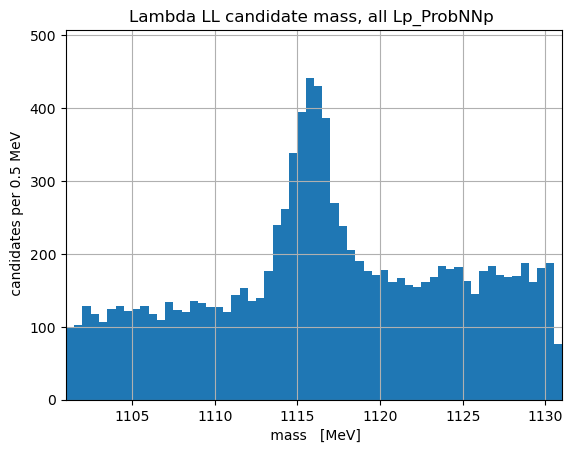

pName =  ./Bp_to_L0pKK_plots/L0bar_p_KK_LambdaLL_Lp_ProbNNp_gt_0p2.png


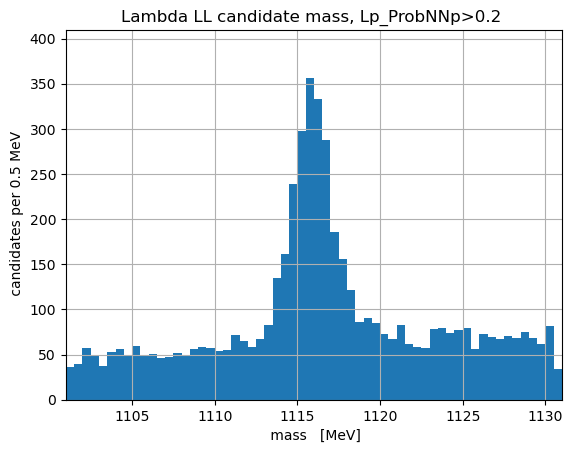

In [29]:
plt.figure()
plt.title("Lambda LL candidate mass, all Lp_ProbNNp ")
nC, bins, patches =  plt.hist(L0_MM[LL], bins=60, range=(1101,1131))
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
pName = plots_dir+"L0bar_p_KK_LambdaLL_Lp_all_ProbNNp.png"
print("pName = ",pName)
plt.savefig(pName)
plt.show()

plt.figure()
plt.title("Lambda LL candidate mass, Lp_ProbNNp>0.2 ")
nC, bins, patches =  plt.hist(L0_MM[(Lp_ProbNNp>0.2) & LL], bins=60, range=(1101,1131))
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
pName = plots_dir+"L0bar_p_KK_LambdaLL_Lp_ProbNNp_gt_0p2.png"
print("pName = ",pName)
plt.savefig(pName)
plt.show()

##. add a similar histogram for LL candidates with Lp_ProbNNp<0.2


Add a cell that fits each of the distributions in the cell above using iMinuit.  To do this, you will need to import iMinuit back in cell [1].

* Note that the last bin in each histogram has fewer entries than you should expect based on the rest of the distribution in each case.  Why do you think this happens?  In doing fits, how you address this issue?

* The peak of the $ \Lambda $ distribution in the sample requiring Lp_ProbNNP>0.2 has a well-determined central value.  When you fit the data with Lp_ProbNNp<0.2, require that the $ \Lambda $ signal has this mass.

*  Based on the fits you do, what is the efficiency of the cut requiring Lp_ProbNNp>0.2?  How does this compare to your guesstimate from eye-balling this distributions?

In [30]:
## add your fitting code here

Although the underlyting physics processes are forward-backward symmetric for proton-proton interactions (with repsect to the beam direction), the LHCb detector is designed to reconstruct $ B $'s (and their daughters) that are moving at relativistic speeds in the $ +z $ direction. As a result, we expect that the $ \Lambda $ vertex position will be found significantly downstream of the primary vertex (PV)  position (the location of the $ pp $ collision). We will study this using two metrics.

* We will look at the absolute separation of the two vertex candidates in the $ z $ direction using the variable Delta_Z (the symbol $ \Delta $ is frequently used in particle physics to denote a difference).

* We will look at the length of the vector separation using L0_FD_CHI2 (the $ \Lambda $ flight distance $ \chi^2 $) that accounts for the length of the vector connecting the $ \Lambda $ and primary vertices and normalizes for the uncertainties in the locations of these vertices.

In the next cell, there is already code that shows $ \Delta z $ for LL candidates. You should modify and extend this code.

* first, modify the code to require Lp_ProbNNp>0.

* add a histogram that "zooms in" to show the distribution for the range $ -2.5 \ {\rm mm} < \Delta z < 17.5 \ {\rm mm} $.

* add a third histogram that shows exactly the same data as in the zoomed-in histogram you just made, but plots the data on a semi-log scale [use plt.yscale(log) and be sure to choose appropriate minimum and maximum  $ y $ values in your plt.axis( ... ) command].

(note that LHCb ntuples use mm for lengths)

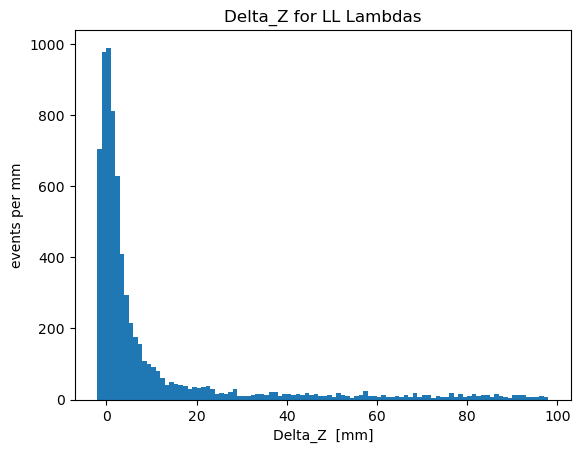

In [31]:
plt.figure()
plt.title("Delta_Z for LL Lambdas")
plt.hist(Delta_Z[LL], bins=100, range=(-2.,98.))
plt.xlabel("Delta_Z  [mm]")
plt.ylabel("events per mm")
plt.show()



The first first histogram in the cell below is one you've seen already.  It shows the L0_MM distribution for LL candidates with Lp_ProbNNP>0.2.

The second histogram shows the L0_MM distribution for the sample with additional requirement that $ \Delta z  > 0 $ and $ \mbox{L0_FD_CHI2} > 9 $. The third histogram shows the distribution excluded by this additional cut.

* Eye-balling these distributions, what is the efficiency of requiring $ \Delta z  > 0 $ and $ \mbox{L0_FD_CHI2} > 9 $

* Fit the two histograms you added and calculate the efficiency from the fits.

* Add histograms similar to the two you made using $ \mbox{L0_FD_CHI2} > 25, \ 100, \ {\rm and} \ 250 $ rather than $ \mbox{L0_FD_CHI2} > 9 $. Fit the pairs of histograms that do and do not satisfy these requirements to extract the efficiencies of the cuts.

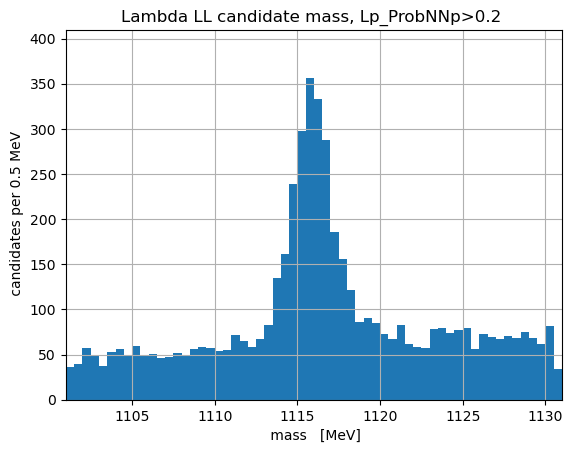

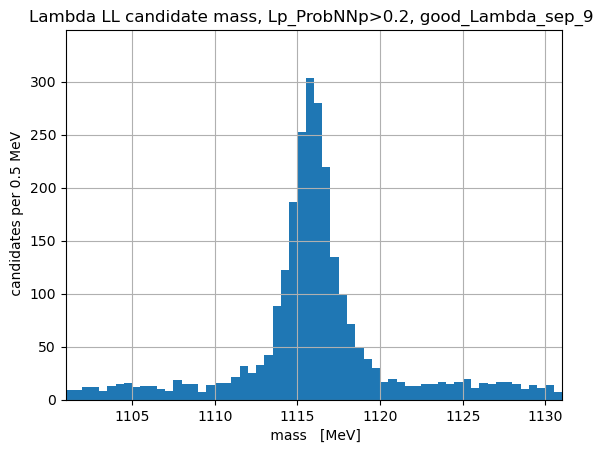

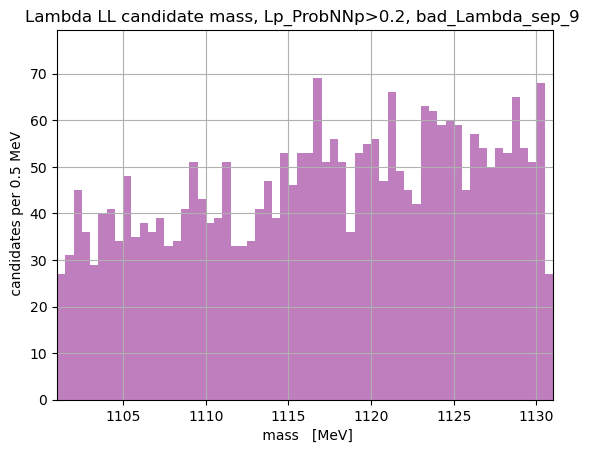

In [32]:
plt.figure()
plt.title("Lambda LL candidate mass, Lp_ProbNNp>0.2 ")
nC, bins, patches = plt.hist(L0_MM[(Lp_ProbNNp>0.2) & LL], bins=60, range=(1101,1131))
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
plt.show()

good_Delta_Z = Delta_Z>0.
good_Lambda_chisq_9 = L0_FD_CHISQ>9.
good_Lambda_sep_9 =  good_Delta_Z & good_Lambda_chisq_9

plt.figure()
plt.title("Lambda LL candidate mass, Lp_ProbNNp>0.2, good_Lambda_sep_9 ")
nC, bins, patches = plt.hist(L0_MM[(Lp_ProbNNp>0.2) & LL & good_Lambda_sep_9], bins=60, range=(1101,1131))
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
plt.show()

#########


bad_Delta_Z = Delta_Z<0.
bad_Lambda_chisq_9  = L0_FD_CHISQ<9.
bad_Lambda_sep_9 =  bad_Delta_Z | bad_Lambda_chisq_9

plt.figure()
plt.title("Lambda LL candidate mass, Lp_ProbNNp>0.2, bad_Lambda_sep_9 ")
nC, bins, patches =  plt.hist(L0_MM[(Lp_ProbNNp>0.2) & LL & bad_Lambda_sep_9], bins=60, range=(1101,1131), color='purple', alpha= 0.50)
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
plt.show()

Now that we know how to clean up the $ \Lambda_{\rm LL} $ sample by requiring good separation between the primary vertex and the $ \Lambda $ vertex, we can revisit the Lp_ProbNNp cut.

* The first histogram shows the distribution for good_Lambda_sep_100 and Lp_ProbNNp>0.2.

* The second histogram shows the distribution for good_Lambda_sep_100 and 0.1 < Lp_ProbNNp < 0.2.  Take a look at the definition of the Boolean array  ProbNNp_0p1_0p2.

* The third and fourth histograms show the same data as in the first two, but with the two datasets superposed. The third histogram display the data on a linear vertical scale and the fourth on a logarithmic scale.  The peak value of the histogram with more entries is  easier to determine by eye on the linear scale while the smaller signal in the second sample and the background levels are easier to determine on the on the logarithmic scale.

---

How can you draw a useful conclusion?  (Can you draw a useful conclusion?)

* Make a histogram of the $ \Lambda_{\rm LL} $ masses requiring good_Lambda_sep_100 and  Lp_ProbNNp > 0.1

* Fit the signals in this new histogram and also in the histograms requiring (good_Lambda_sep_100 and Lp_ProbNNp>0.2) and (good_Lambda_sep_100 and 0.1 < Lp_ProbNNp < 0.2).  Check that the results are self-consistent. Which cuts would you choose?




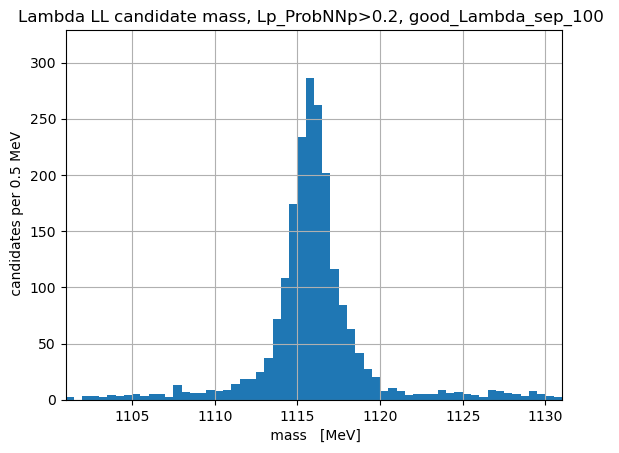

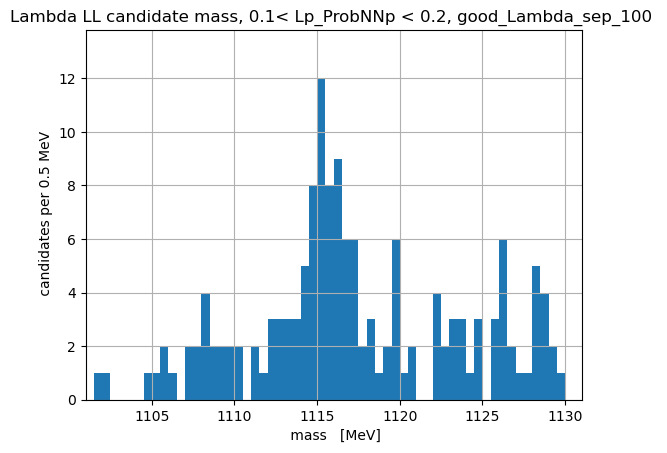

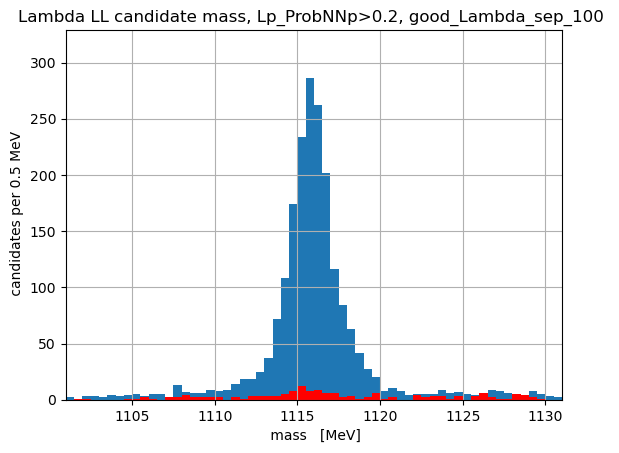

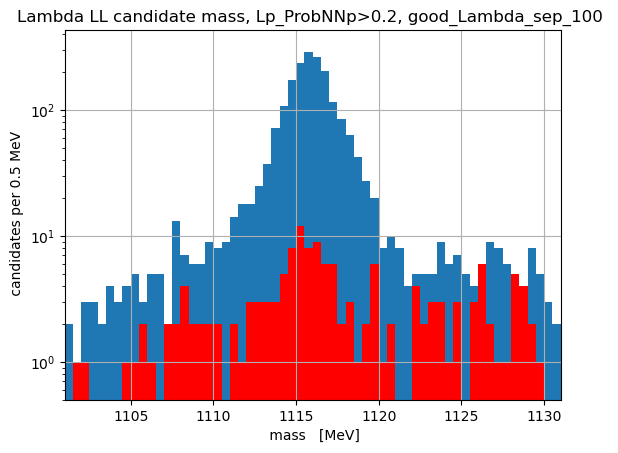

In [33]:
## this cell looks at the signal between Lp_ProbNNp = 0.1 and Lp_ProbNNp = 0.2 for LL candidates

#########

good_Delta_Z = Delta_Z>0.
good_Lambda_chisq_100  = L0_FD_CHISQ>100.
good_Lambda_sep_100 =  good_Delta_Z & good_Lambda_chisq_100

plt.figure()
plt.title("Lambda LL candidate mass, Lp_ProbNNp>0.2, good_Lambda_sep_100 ")
nC, bins, patches = plt.hist(L0_MM[(Lp_ProbNNp>0.2) & LL & good_Lambda_sep_100], bins=60, range=(1101,1131))
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
##pName = plots_dir+"L0bar_p_KK_LambdaDD_Lp_ProbNNp_gt_0p2_sep100.png"
##print("pName = ",pName)
##plt.savefig(pName)
plt.show()

######### 

ProbNNp_0p1_0p2 = (Lp_ProbNNp>0.1) & (Lp_ProbNNp<0.2)

plt.figure()
plt.title("Lambda LL candidate mass, 0.1< Lp_ProbNNp < 0.2, good_Lambda_sep_100 ")
nC, bins, patches = plt.hist(L0_MM[(ProbNNp_0p1_0p2) & LL & good_Lambda_sep_100], bins=60, range=(1101,1131))
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
##pName = plots_dir+"L0bar_p_KK_LambdaDD_Lp_ProbNNp_gt_0p2_sep100.png"
##print("pName = ",pName)
##plt.savefig(pName)
plt.show()

plt.figure()
plt.title("Lambda LL candidate mass, Lp_ProbNNp>0.2, good_Lambda_sep_100 ")
nC, bins, patches = plt.hist(L0_MM[(Lp_ProbNNp>0.2) & LL & good_Lambda_sep_100], bins=60, range=(1101,1131))
nC_0p1_0p2, bins, patches = plt.hist(L0_MM[(ProbNNp_0p1_0p2) & LL & good_Lambda_sep_100], bins=60, range=(1101,1131),color='r')
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
##pName = plots_dir+"L0bar_p_KK_LambdaDD_Lp_ProbNNp_gt_0p2_sep100.png"
##print("pName = ",pName)
##plt.savefig(pName)
plt.show()

plt.figure()
plt.title("Lambda LL candidate mass, Lp_ProbNNp>0.2, good_Lambda_sep_100 ")
nC, bins, patches = plt.hist(L0_MM[(Lp_ProbNNp>0.2) & LL & good_Lambda_sep_100], bins=60, range=(1101,1131))
nC_0p1_0p2, bins, patches = plt.hist(L0_MM[(ProbNNp_0p1_0p2) & LL & good_Lambda_sep_100], bins=60, range=(1101,1131),color='r')
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.yscale('log')
plt.axis([1101.,1131.,0.5,1.5*max(nC)])
plt.grid(True)
##pName = plots_dir+"L0bar_p_KK_LambdaDD_Lp_ProbNNp_gt_0p2_sep100.png"
##print("pName = ",pName)
##plt.savefig(pName)
plt.show()


Let's study cuts on Lp_ProbNNp for $ \Lambda_{\rm DD} $ candidates, as we did for $ \Lambda_{\rm LL} $.  Even though the variable has the same name as for $ \Lambda_{\rm LL} $ candidates, the detailed meaning is somewhat diffferent. The two RICH detectors (ring imaging Cherenkov detectors) provide most of the proton/kaon/pion separation. Downstream tracks traverse only RICH2,  not RICH1, while long tracks generally traverse both. There is a second order effect as the ability of the RICH to discriminate between mass hypotheses depends on momentum. The $ \Lambda_{\rm LL} $ and $ \Lambda_{\rm DD} $ may have different momentum distributions, something you can check.

* First, look at the L0_MM distributions for $ \Lambda_{\rm DD} $ candidates  with Lp_ProbNNp>0.2 and with Lp_ProbNNp<0.2. 

* Then, Look at the L0_MM distribution for $ \Lambda_{\rm DD} $ candidates  with 0.1<Lp_ProbNNp<0.2.

* Fit the first two distributions and estimate what fraction of the signal is lost by requiring Lp_ProbNNP>0.2.

* Fit the L0_MM distribution for $ \Lambda_{\rm DD} $ candidates  with 0.1<Lp_ProbNNp<0.2.  What fraction of the Lp_ProbNNp>0.2 is found here?  How would you characterize the signal-to-background distributions in these samples?

* What Lp_ProbNNp cut would you want to use for $ \Lambda_{\rm DD} $ candidates?

In [34]:
## use this cell looks at the signal between ProbNNp = 0.1 and ProbNNp = 0.2 for DD candidates, etc



The next cell shows the ProbNNk values for the kaon candidates in this NTUPLE.  As the distributions peak near 1 with no peak near 0 (unlike for the Lp_ProbNNp distributions studied above), we can conclude that some selection criteria were applied when $ B^+ \to \bar \Lambda p K^+ K^- $ candidates were selected and the NTUPLE created.  For a final physics analysis, it will be necessary to estimate the efficiency of that selection criterion.

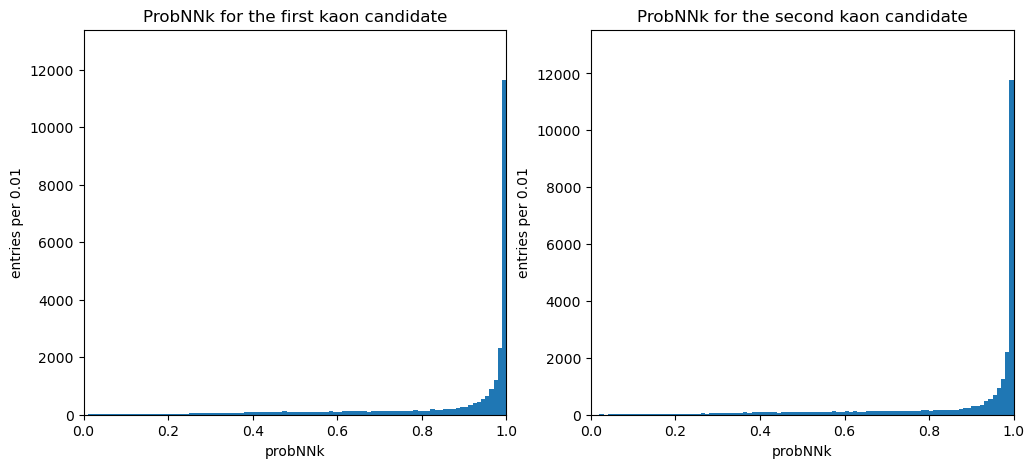

In [35]:
## set parameters to make two "subplots" fit in the browser window side-by-side
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size


ig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size


h2_probNNk = arrs['h2_MC15TuneV1_ProbNNk']
h1_probNNk = arrs['h1_MC15TuneV1_ProbNNk']
p_ProbNNp  = arrs['p_MC15TuneV1_ProbNNp']

plt.subplot(1,2,1)
plt.title('ProbNNk for the first kaon candidate')
nC, bins, patches = plt.hist(h1_probNNk, bins=100, range=(0.,1.))
plt.xlabel('probNNk')
plt.ylabel('entries per 0.01')
plt.axis([0.,1.,0.,1.15*max(nC)])

plt.subplot(1,2,2)
plt.title('ProbNNk for the second kaon candidate')
nC, bins, patches = plt.hist(h2_probNNk, bins=100, range=(0.,1.))
plt.xlabel('probNNk')
plt.ylabel('entries per 0.01')
plt.axis([0.,1.,0.,1.15*max(nC)])

plt.show()


## reset plotting parameters so plt.figure() plots look good
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size



Although it appears that some kaon identifcation was done for each track in selecting events for the NTUPLE, the distributions for h1 and h2 extend down to values down to a bit more than 0.

* Use the len(array_name) command to estimate what fraction of candidates would be removed if we required both h1_probNNk>0.8 and h2_probNNk>0.8.

What we are doing to do is slightly more sophisticated.  Rather than cut separately on each kaon's ProbNNk value, we will cut on the product probability (prodProbKK) defined in the cell below.

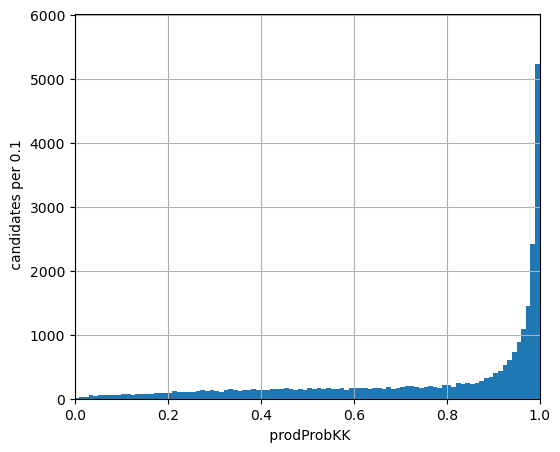

In [36]:
prodProbKK = np.multiply(h1_probNNk,h2_probNNk)

plt.figure()
nC, bins, patches = plt.hist(prodProbKK, bins=100, range=(0.,1.))
plt.xlabel(" prodProbKK")
plt.ylabel(" candidates per 0.1")
plt.axis([0.,1.,0,1.15*max(nC)])
plt.grid(True)
plt.show()

In the cell below, two possible prodProbNNp selection criteria are defined (the same value for long tracks and downstream tracks, so not as sophisticated as it might be).


A histogram of $ B $-candidate masses is made with no cuts.

* Using a good_Lambda definition of your choice (based on work in earlier cells), a histogram of $ B $-candidate masses with good $ \Lambda $ candidates. Do this first based only on vertex separation for LL candidates and on Lp_ProbNNp for both LL and DD candidates. Then repeat with some sort of mass window for the $ m(\Lambda \to p \pi )$.

* Starting with your good_Lambda definition, look at the $ B $-candidate masses for prodProbKK>0.5 and for prodProbKK<0.5.  Then repeat for prodProbKK>0.8 and prodProbKK<0.8.  

* Fit the histograms in this cell to determine how many signal events are found in each sample.  Do the numbers of the disjoint samples (prodProbKK>xxx and prodProbKK<xxx) always add up to the expected number?

* Choose a prodProbKK cut that you judge "optimal".  Make histograms of the samples that satisfy and fail this cut and fit them.  Write a few sentences explaining why you prefer this cut value.




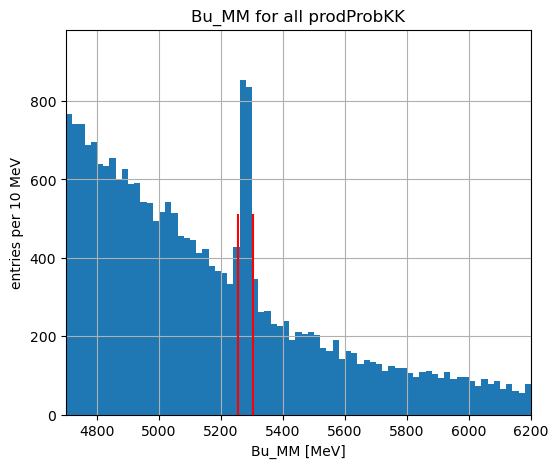

In [37]:
prodProb_0p8 = prodProbKK>0.8
prodProb_0p5 = prodProbKK>0.5



plt.figure()
plt.title('Bu_MM for all prodProbKK')
nC, bins, patches = plt.hist(Bu_MM, bins=75, range=(4700,6200))
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6200.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), colors='red')
plt.vlines(5305., 0., 0.6*max(nC), colors='red')
plt.show()





In [38]:

def gaussianA(x, mu, sigma):
## returns the number per bin for a normalized Guassian
  return bin_width * np.exp(-(x-mu)**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)

def expA(x,A,b):
## returns the number per bin for a normalized exponential
## NB:  the method assumes a falling exponential for a positive value of b, 
## the coefficient of x in the exponential

## NB: this method requires that xMin and xMax be
## specified in the code before this method is invoked

## norm is the integral of a*x+b from xMin to xMax
## where xMin and xMax are meant to define the region
## over which the fit is done. By normalizing in this
## way, linear will be a normalized pdff over this interval
    
    integral = (A/b) * (1.0-math.exp(-b*(xMax-xMin)))
    norm = 1./integral
    
    binned_exponential = norm * A * np.exp(-b*(x-xMin))
    ret = bin_width * norm * A * np.exp(-b*(x-xMin))
##    print('A %5.3f, b %6.4f, integral %5.2f, norm %6.4f = ' % (A, b, integral,norm))
##    print('binned_exponential[0] = %f6.3' %(binned_exponential[0]))
##    print('ret[0],ret[len(ret)-1] =  %f6.3 %f6.3' % (ret[0],ret[len(ret)-1]))
    return ret

def Gaussian_plus_ExpA(x_vals, n_s, n_b, mu, sigma, A ,b):
  return n_s * gaussianA(x_vals, mu, sigma) + n_b * expA(x_vals, A, b)


def chi2_Gaussian_plus_ExpA(n_s, n_b, mu, sigma, A, b):
## NB: this method requires that x_vals, y_vals, y_errs, and bin_width
## are defined in the code before this method is called.
    
    mask = (0 != y_errs)
    prediction = Gaussian_plus_ExpA(x_vals[mask],n_s, n_b, mu, sigma, A, b)
    ressq = (y_vals[mask] - prediction)**2 / np.square(y_errs[mask])
    
##    print('prediction[0] = %7.3f, prediction[74] = %7.3f' %(prediction[0],prediction[74]))
##    print('y_vals[0] = %7.3f, y_vals[74] = %7.3f' %(y_vals[0],y_vals[74]))
    return ressq.sum()

## ------------------------


In [39]:
xMin = bins[0]
xMax = bins[len(bins)-1]
print('xMin, xMax = ',xMin,xMax)
bin_width = bins[1]-bins[0]
print('bin_width = ',bin_width)
x_vals = bins[0:len(bins)-1]+ 0.5*bin_width
##print('x_vals = ',x_vals)
y_vals = nC
y_errs = np.sqrt(nC)
##print('y_errs = ',y_errs)

total_entries = np.sum(nC)
print('total_entries = ',total_entries)

init_pars = [1000., 20000., 5280., 10., 0.04, 0.005]
m = Minuit(chi2_Gaussian_plus_ExpA, n_s=init_pars[0], n_b=init_pars[1], mu=init_pars[2], sigma=init_pars[3], A=init_pars[4], b=init_pars[5])
m.migrad()

xMin, xMax =  4700.0 6200.0
bin_width =  20.0
total_entries =  23183.0


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 124                        │              Nfcn = 179              │
│ EDM = 3.79e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ n_s   │  1.28e3   │  0.05e3   │            │            │         │         │       │
│ 1 │ n_b   │  21.78e3  │  0.15e3   │            │            │         │         │       │
│ 2 │ mu    │ 5.2792e3  │ 0.0007e3  │            │            │         │         │       │
│ 3 │ sigma │   14.8    │    0.7    │            │            │         │         │       │
│ 4 │ A     │     0     │   0.8e3   │            │            │         │         │       │
│ 5 │ b     │ 1.779e-3  │ 0.018e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────┐
│       │          n_s          n_b           mu        sigma            A            b │
├───────┼───────────────────────────────────────────────────────────────────────────────┤
│   n_s │     2.72e+03       -1.2e3         -2.2         13.5            0  59.50284e-6 │
│   n_b │       -1.2e3     2.38e+04          1.8        -12.9           -0 -18.24545e-6 │
│    mu │         -2.2          1.8        0.463         -0.1         -0.0    -13.15e-9 │
│ sigma │         13.5        -12.9         -0.1        0.431          0.0    575.76e-9 │
│     A │            0           -0         -0.0          0.0     6.26e+05           -0 │
│     b │  59.50284e-6 -18.24545e-6    -13.15e-9    575.76e-9           -0     3.35e-10 │
└───────┴───────────────────────────────────────────────────────────────────────────────┘

In [40]:
for p, v, e in zip(m.parameters, m.values, m.errors):
    print('p, v, e = ',p,v,e)


p, v, e =  n_s 1277.7780661895224 52.13983088860734
p, v, e =  n_b 21782.20476189403 154.26160573963801
p, v, e =  mu 5279.178437942721 0.680382310215172
p, v, e =  sigma 14.824994972271648 0.6564315871890324
p, v, e =  A 0.040002298161536116 791.090368686597
p, v, e =  b 0.0017788545709261677 1.831177213713372e-05


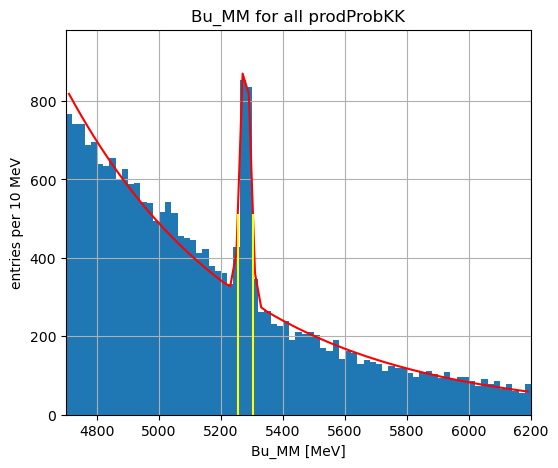

In [41]:
plt.figure()
plt.title('Bu_MM for all prodProbKK')
nC, bins, patches = plt.hist(Bu_MM, bins=75, range=(4700,6200))
mask = (0 != y_errs)
predictions = Gaussian_plus_ExpA(x_vals[mask],*m.values)
plt.plot(x_vals,predictions, 'r-', label='Fit')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6200.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), colors='yellow')
plt.vlines(5305., 0., 0.6*max(nC), colors='yellow')
plt.show()


Let's define some Boolean arrays that characterize our events

In [81]:
B_region = (Bu_MM>5255.) & (Bu_MM<5305.)
prodProbNNx = np.multiply(p_ProbNNp,prodProbKK)

good_LambdaLL   = (Lp_ProbNNp>0.2) & (L0_MM>1111) & (L0_MM<1121) & good_Delta_Z & good_Lambda_chisq_100 & LL
good_LambdaDD   = (Lp_ProbNNp>0.2) & (L0_MM>1111) & (L0_MM<1121) & DD
good_Lambda     = good_LambdaLL | good_LambdaDD
good_prompt     = (Lp_ProbNNp>0.2) & (L0_FD_CHISQ<9) & LL
better_Lambda   = good_Lambda & (Bu_IPCHI2_OWNPV<6) 
better_LambdaLL = good_LambdaLL & (Bu_IPCHI2_OWNPV<6)
better_LambdaDD = good_LambdaDD & (Bu_IPCHI2_OWNPV<6)

temp_cut = good_Delta_Z & good_Lambda_chisq_100 & (Lp_ProbNNp>0.2)
temp_cutLL = temp_cut & LL
temp_cutDD = temp_cut & DD

In the cell below, there is a histogram of Bu_MM for the good_LambdaLL candidates.

*  Add the corresponding plots for the good_Lambda_DD candidates and for the good_prompt candidates. 

*  Make a plot for the (combined) good_Lambda candidates

*  Fit all signals.  Are the results self-consistent?

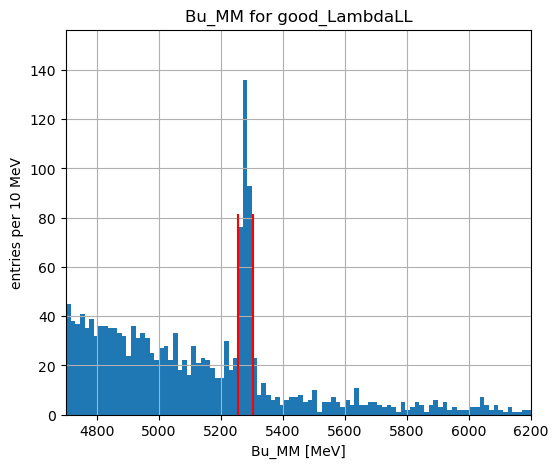

In [43]:
## the code to make the histogram for the good_LambdaLL sample is provided.

plt.figure()
plt.title('Bu_MM for good_LambdaLL')
nC_LL, bins_LL, patches = plt.hist(Bu_MM[good_LambdaLL], bins=100, range=(4700,6200))
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6200.,0,1.15*max(nC_LL)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC_LL), colors='red')
plt.vlines(5305., 0., 0.6*max(nC_LL), colors='red')
plt.show()



In [44]:
def gaussian(x, mu, sigma):
## returns the number per bin for a normalized Guassian
  return bin_width * np.exp(-(x-mu)**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)

def exp(x,A,b):
## returns the number per bin for a normalized exponential
## NB:  the method assumes a falling exponential for a positive value of b, 
## the coefficient of x in the exponential

## NB: this method requires that xMin and xMax be
## specified in the code before this method is invoked

## norm is the integral of a*x+b from xMin to xMax
## where xMin and xMax are meant to define the region
## over which the fit is done. By normalizing in this
## way, linear will be a normalized pdff over this interval
    
    
##    print('A =  %5.3f, b =  %6.4f,  = ' % (A, b))
    integral = (A/b) * (1.0-math.exp(-b*(xMax-xMin)))
    norm = 1./integral

    binned_exponential = norm * A * np.exp(-b*(x-xMin))
    ret = bin_width * norm * A * np.exp(-b*(x-xMin))
##    print('A %5.3f, b %6.4f, integral %5.2f, norm %6.4f = ' % (A, b, integral,norm))
##    print('binned_exponential[0] = %f6.3' %(binned_exponential[0]))
##    print('ret[0],ret[len(ret)-1] =  %f6.3 %f6.3' % (ret[0],ret[len(ret)-1]))
    return ret

def Gaussian_plus_Exp(x_vals, n_s, n_b, mu, sigma, A ,b):
  return n_s * gaussian(x_vals, mu, sigma) + n_b * exp(x_vals, A, b)


def chi2_Gaussian_plus_Exp(n_s, n_b, mu, sigma, A, b):
## NB: this method requires that x_vals, y_vals, y_errs, and bin_width
## are defined in the code before this method is called.
    
##    print('in chi2_Gaussian_plus_Exp, y_vals[0] = ',y_vals[0])
    mask = (0 != y_errs)
    prediction = Gaussian_plus_Exp(x_vals[mask],n_s, n_b, mu, sigma, A, b)
    ressq = (y_vals[mask] - prediction)**2 / np.square(y_errs[mask])
    
##    print('prediction[0] = %7.3f, prediction[74] = %7.3f' %(prediction[0],prediction[74]))
##    print('y_vals[0] = %7.3f, y_vals[74] = %7.3f' %(y_vals[0],y_vals[74]))
    return ressq.sum()

## ------------------------

In [45]:
def Fit_Setup(nC,bins):
    xMin = bins[0]
    xMax = bins[len(bins)-1]
    print('xMin, xMax = ',xMin,xMax)
    bin_width = bins[1]-bins[0]
    print('bin_width = ',bin_width)
    x_vals = bins[0:len(bins)-1]+ 0.5*bin_width
    y_vals = nC
    ## print("x_vals = ",x_vals)
    print("y_vals[0:10] = ",y_vals[0:10])
    y_errs = np.sqrt(nC)
    return xMin, xMax, bin_width, x_vals, y_vals, y_errs

In [46]:
xMin, xMax, bin_width, x_vals, y_vals, y_errs = Fit_Setup(nC_LL,bins_LL)
m1 = Minuit(chi2_Gaussian_plus_Exp, n_s=init_pars[0], n_b=init_pars[1], mu=init_pars[2], sigma=init_pars[3], A=init_pars[4], b=init_pars[5])
m1.limits["A"] = (0.0001,0.2)
m1.limits["n_s"] = (0.0001,100000)
m1.limits["n_b"] = (0.0001,1000000)
m1.migrad()

xMin, xMax =  4700.0 6200.0
bin_width =  15.0
y_vals[0:10] =  [45. 38. 37. 41. 35. 39. 32. 36. 36. 35.]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 112.1                      │              Nfcn = 438              │
│ EDM = 5.47e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ n_s   │    297    │    20     │            │            │ 0.0001  │ 100000  │       │
│ 1 │ n_b   │  1.23e3   │  0.04e3   │            │            │ 0.0001  │  1e+06  │       │
│ 2 │ mu    │ 5.2786e3  │ 0.0010e3  │            │            │         │         │       │
│ 3 │ sigma │   13.8    │    0.8    │            │            │         │         │       │
│ 4 │ A     │   0.04    │   0.10    │            │            │ 0.0001  │   0.2   │       │
│ 5 │ b     │  2.58e-3  │  0.09e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────────────────┐
│       │         n_s         n_b          mu       sigma           A           b │
├───────┼─────────────────────────────────────────────────────────────────────────┤
│   n_s │         395          -0         1.0         2.8           0  -31.672e-6 │
│   n_b │          -0    1.34e+03         2.2        -2.5          -0 -350.748e-6 │
│    mu │         1.0         2.2        1.03        -0.1         0.0   -7.276e-6 │
│ sigma │         2.8        -2.5        -0.1       0.632        -0.0    4.216e-6 │
│     A │           0          -0         0.0        -0.0    8.69e+03       -1e-9 │
│     b │  -31.672e-6 -350.748e-6   -7.276e-6    4.216e-6       -1e-9    8.66e-09 │
└───────┴─────────────────────────────────────────────────────────────────────────┘

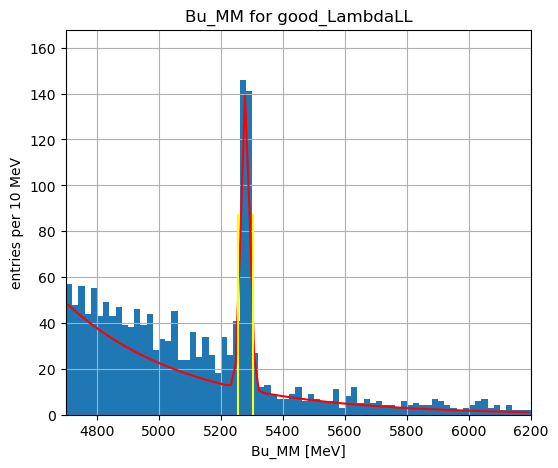

In [47]:
plt.figure()
plt.title('Bu_MM for good_LambdaLL')
nC_LL, bins_LL, patches = plt.hist(Bu_MM[good_LambdaLL], bins=75, range=(4700,6200))
mask = (0 != y_errs)
predictions = Gaussian_plus_Exp(x_vals[mask],*m1.values)
plt.plot(x_vals,predictions, 'r-', label='Fit')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6200.,0,1.15*max(nC_LL)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC_LL), colors='yellow')
plt.vlines(5305., 0., 0.6*max(nC_LL), colors='yellow')
plt.show()


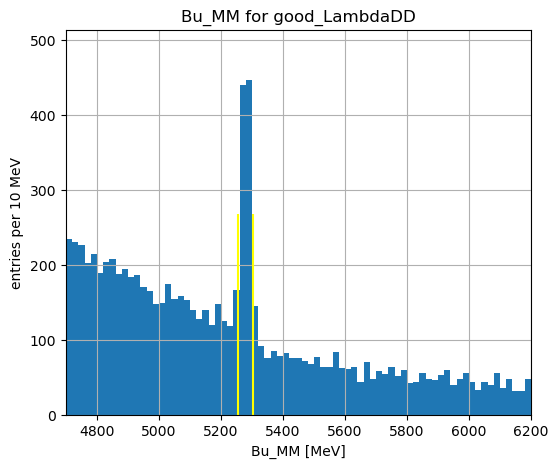

In [48]:
plt.figure()
plt.title('Bu_MM for good_LambdaDD')
nC_DD, bins_DD, patches = plt.hist(Bu_MM[good_LambdaDD], bins=75, range=(4700,6200))
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6200.,0,1.15*max(nC_DD)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC_DD), colors='yellow')
plt.vlines(5305., 0., 0.6*max(nC_DD), colors='yellow')
plt.show()



In [49]:
xMin, xMax, bin_width, x_vals, y_vals, y_errs = Fit_Setup(nC_DD,bins_DD)
m1 = Minuit(chi2_Gaussian_plus_Exp, n_s=init_pars[0], n_b=init_pars[1], mu=init_pars[2], sigma=init_pars[3], A=init_pars[4], b=init_pars[5])
m1.limits["b"] = (0.00001,0.2)
m1.limits["A"] = (0.0001,0.2)
m1.limits["n_s"] = (0.0001,100000)
m1.limits["n_b"] = (0.0001,1000000)
m1.migrad()

xMin, xMax =  4700.0 6200.0
bin_width =  20.0
y_vals[0:10] =  [234. 230. 226. 202. 215. 189. 204. 208. 188. 195.]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 96.04                      │              Nfcn = 200              │
│ EDM = 3.97e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ n_s   │    774    │    35     │            │            │ 0.0001  │ 100000  │       │
│ 1 │ n_b   │  7.51e3   │  0.08e3   │            │            │ 0.0001  │  1e+06  │       │
│ 2 │ mu    │ 5.2799e3  │ 0.0007e3  │            │            │         │         │       │
│ 3 │ sigma │   14.4    │    0.7    │            │            │         │         │       │
│ 4 │ A     │   0.05    │   0.12    │            │            │ 0.0001  │   0.2   │       │
│ 5 │ b     │ 1.387e-3  │ 0.030e-3  │            │            │  1e-05  │   0.2   │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────────────────┐
│       │         n_s         n_b          mu       sigma           A           b │
├───────┼─────────────────────────────────────────────────────────────────────────┤
│   n_s │    1.22e+03      -0.8e3        -0.6         7.2       0.000  45.8542e-6 │
│   n_b │      -0.8e3    5.87e+03         2.3       -14.7      -0.000 157.4596e-6 │
│    mu │        -0.6         2.3       0.551        -0.1      -0.000     41.1e-9 │
│ sigma │         7.2       -14.7        -0.1       0.463       0.000   1.0975e-6 │
│     A │       0.000      -0.000      -0.000       0.000      0.0139          -0 │
│     b │  45.8542e-6 157.4596e-6     41.1e-9   1.0975e-6          -0    9.13e-10 │
└───────┴─────────────────────────────────────────────────────────────────────────┘

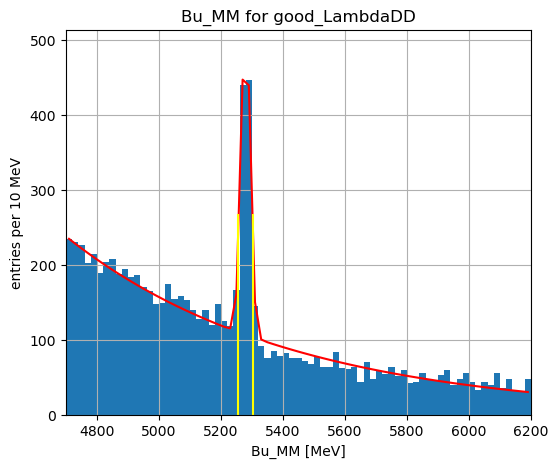

In [50]:
plt.figure()
plt.title('Bu_MM for good_LambdaDD')
nC, bins, patches = plt.hist(Bu_MM[good_LambdaDD], bins=75, range=(4700,6200))
mask = (0 != y_errs)
predictions = Gaussian_plus_Exp(x_vals[mask],*m1.values)
plt.plot(x_vals,predictions, 'r-', label='Fit')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6200.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), colors='yellow')
plt.vlines(5305., 0., 0.6*max(nC), colors='yellow')
plt.show()



In the cell below, make and fit the histograms for the better_LambdaLL, better_LambdaDD, and better_Lambda candidates.  

Once you have done this, make plots for the good_LambdaLL, good_LambdaDD, and good_Lambda samples with the corresponding better_Lambda superposed in another color.  What conclusions do you draw?  [hint: it may be helpful to make these plots using plt.yscale('log') in addition to the linear plots.

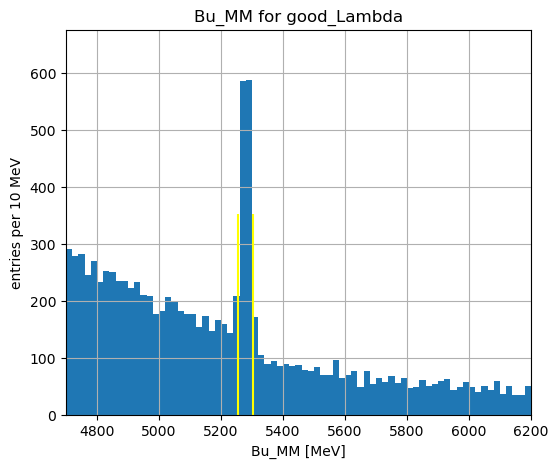

In [51]:
plt.figure()
plt.title('Bu_MM for good_Lambda')
nC_all, bins_all, patches = plt.hist(Bu_MM[good_Lambda], bins=75, range=(4700,6200))
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6200.,0,1.15*max(nC_all)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC_all), colors='yellow')
plt.vlines(5305., 0., 0.6*max(nC_all), colors='yellow')
plt.show()



In [52]:

xMin, xMax, bin_width, x_vals, y_vals, y_errs = Fit_Setup(nC_all,bins_all)
m1 = Minuit(chi2_Gaussian_plus_Exp, n_s=init_pars[0], n_b=init_pars[1], mu=init_pars[2], sigma=init_pars[3], A=init_pars[4], b=init_pars[5])
m1.limits["b"] = (0.0000001,0.2)
m1.limits["A"] = (0.000001,0.2)
m1.limits["n_s"] = (0.0001,100000)
m1.limits["n_b"] = (0.0001,1000000)
m1.migrad()

xMin, xMax =  4700.0 6200.0
bin_width =  20.0
y_vals[0:10] =  [291. 278. 282. 246. 270. 232. 253. 251. 235. 234.]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 124.5                      │              Nfcn = 189              │
│ EDM = 3.84e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ n_s   │  1.06e3   │  0.04e3   │            │            │ 0.0001  │ 100000  │       │
│ 1 │ n_b   │  8.84e3   │  0.09e3   │            │            │ 0.0001  │  1e+06  │       │
│ 2 │ mu    │ 5.2796e3  │ 0.0006e3  │            │            │         │         │       │
│ 3 │ sigma │   14.3    │    0.5    │            │            │         │         │       │
│ 4 │ A     │   0.04    │   0.11    │            │            │  1e-06  │   0.2   │       │
│ 5 │ b     │ 1.513e-3  │ 0.029e-3  │            │            │  1e-07  │   0.2   │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────────────────┐
│       │         n_s         n_b          mu       sigma           A           b │
├───────┼─────────────────────────────────────────────────────────────────────────┤
│   n_s │    1.59e+03      -0.5e3        -0.5        6.05      -0.000  42.7694e-6 │
│   n_b │      -0.5e3    8.86e+03        -0.4       -2.50       0.000 -93.3653e-6 │
│    mu │        -0.5        -0.4       0.364       -0.03      -0.000    105.5e-9 │
│ sigma │        6.05       -2.50       -0.03        0.28       0.000    881.3e-9 │
│     A │      -0.000       0.000      -0.000       0.000      0.0128           0 │
│     b │  42.7694e-6 -93.3653e-6    105.5e-9    881.3e-9           0    8.24e-10 │
└───────┴─────────────────────────────────────────────────────────────────────────┘

In [53]:
for p, v, e in zip(m1.parameters, m1.values, m1.errors):
    print('p, v, e = ',p,v,e)

p, v, e =  n_s 1058.9969570987635 39.86570932618298
p, v, e =  n_b 8836.036942087885 94.1102024250722
p, v, e =  mu 5279.601056467747 0.6036258375733504
p, v, e =  sigma 14.288127945743557 0.5288896197109162
p, v, e =  A 0.040000000007570306 0.11418774378853362
p, v, e =  b 0.0015128255235050331 2.8712971705163455e-05


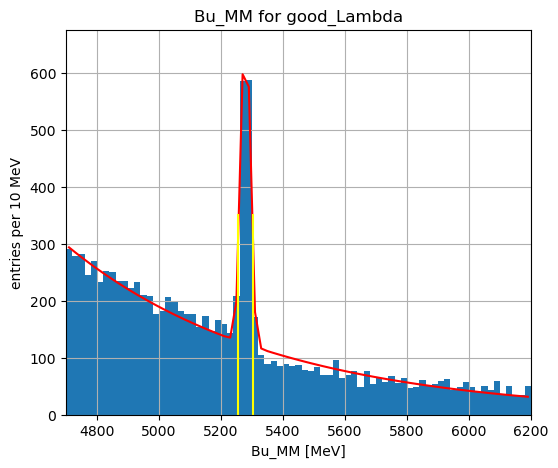

In [54]:
plt.figure()
plt.title('Bu_MM for good_Lambda')
nC, bins, patches = plt.hist(Bu_MM[good_Lambda], bins=75, range=(4700,6200))
mask = (0 != y_errs)
predictions = Gaussian_plus_Exp(x_vals[mask],*m1.values)
plt.plot(x_vals,predictions, 'r-', label='Fit')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6200.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), colors='yellow')
plt.vlines(5305., 0., 0.6*max(nC), colors='yellow')
plt.show()


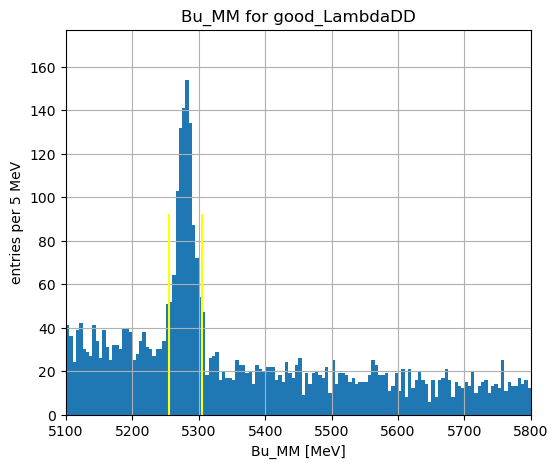

xMin, xMax =  5100.0 5800.0
bin_width =  5.0
y_vals[0:10] =  [41. 36. 24. 39. 42. 30. 29. 27. 41. 34.]
p, v, e =  n_s 781.142647992732 33.93236691955565
p, v, e =  n_b 2805.1265891098674 56.15796003562673
p, v, e =  mu 5279.854160883966 0.622215990475068
p, v, e =  sigma 12.757144032477031 0.587217762619293
p, v, e =  A 0.03928122254899893 0.11361564110396069
p, v, e =  b 0.0016544002005324395 0.00010599362658731196


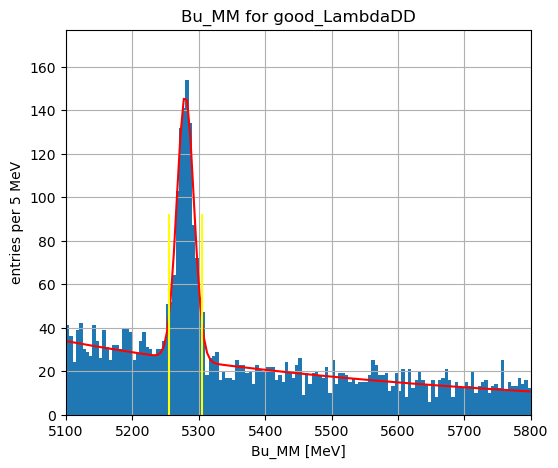

In [55]:
plt.figure()
plt.title('Bu_MM for good_LambdaDD')
nC_DDa, bins_DDa, patches = plt.hist(Bu_MM[good_LambdaDD], bins=140, range=(5100,5800))
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([5100,5800,0,1.15*max(nC_DDa)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC_DDa), colors='yellow')
plt.vlines(5305., 0., 0.6*max(nC_DDa), colors='yellow')
plt.show()

xMin, xMax, bin_width, x_vals, y_vals, y_errs = Fit_Setup(nC_DDa,bins_DDa)
m1 = Minuit(chi2_Gaussian_plus_Exp, n_s=init_pars[0], n_b=init_pars[1], mu=init_pars[2], sigma=init_pars[3], A=init_pars[4], b=init_pars[5])
m1.limits["b"] = (0.0000001,0.2)
m1.limits["A"] = (0.000001,0.2)
m1.limits["n_s"] = (0.0001,100000)
m1.limits["n_b"] = (0.0001,1000000)
m1.migrad()

for p, v, e in zip(m1.parameters, m1.values, m1.errors):
    print('p, v, e = ',p,v,e)

plt.figure()
plt.title('Bu_MM for good_LambdaDD')
nC_DDa, bins_DDa, patches = plt.hist(Bu_MM[good_LambdaDD], bins=140, range=(5100,5800))
mask = (0 != y_errs)
predictions = Gaussian_plus_Exp(x_vals[mask],*m1.values)
plt.plot(x_vals,predictions, 'r-', label='Fit')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([5100,5800,0,1.15*max(nC_DDa)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC_DDa), colors='yellow')
plt.vlines(5305., 0., 0.6*max(nC_DDa), colors='yellow')
plt.show()


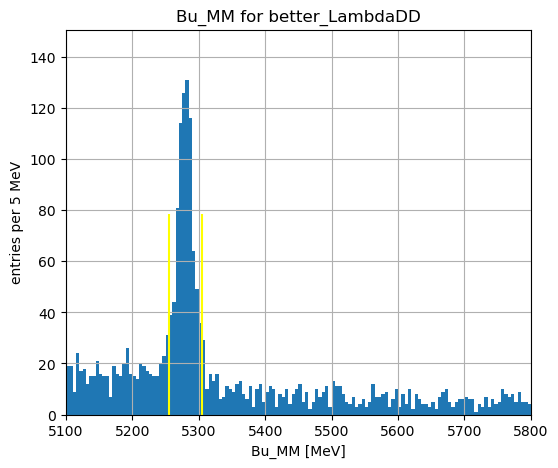

xMin, xMax =  5100.0 5800.0
bin_width =  5.0
y_vals[0:10] =  [19. 19.  9. 24. 17. 18. 12. 15. 15. 21.]
p, v, e =  n_s 724.2414643233193 30.236295316544613
p, v, e =  n_b 1138.365532268435 36.63632182356287
p, v, e =  mu 5279.573831371358 0.5706856245685004
p, v, e =  sigma 12.764762439681917 0.5957005596287975
p, v, e =  A 0.04019761887042778 0.11950415361237689
p, v, e =  b 0.0024988621186258133 0.00016983447349343652


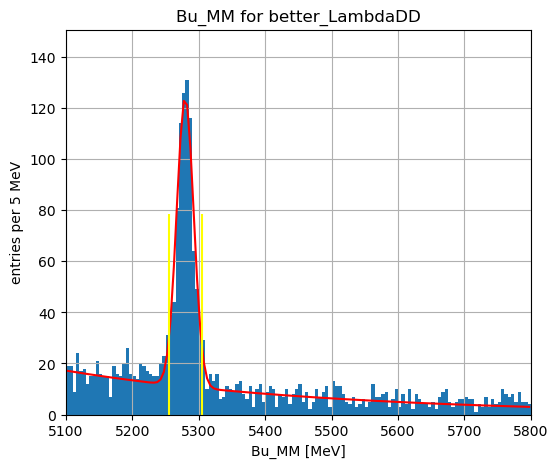

In [56]:
plt.figure()
plt.title('Bu_MM for better_LambdaDD')
nC_DDb, bins_DDb, patches = plt.hist(Bu_MM[better_LambdaDD], bins=140, range=(5100,5800))
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([5100,5800,0,1.15*max(nC_DDb)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC_DDb), colors='yellow')
plt.vlines(5305., 0., 0.6*max(nC_DDb), colors='yellow')
plt.show()

xMin, xMax, bin_width, x_vals, y_vals, y_errs = Fit_Setup(nC_DDb,bins_DDb)
m1 = Minuit(chi2_Gaussian_plus_Exp, n_s=init_pars[0], n_b=init_pars[1], mu=init_pars[2], sigma=init_pars[3], A=init_pars[4], b=init_pars[5])
m1.limits["b"] = (0.0000001,0.2)
m1.limits["A"] = (0.000001,0.2)
m1.limits["n_s"] = (0.0001,100000)
m1.limits["n_b"] = (0.0001,1000000)
m1.migrad()

for p, v, e in zip(m1.parameters, m1.values, m1.errors):
    print('p, v, e = ',p,v,e)

plt.figure()
plt.title('Bu_MM for better_LambdaDD')
nC_DDb, bins_DDb, patches = plt.hist(Bu_MM[better_LambdaDD], bins=140, range=(5100,5800))
mask = (0 != y_errs)
predictions = Gaussian_plus_Exp(x_vals[mask],*m1.values)
plt.plot(x_vals,predictions, 'r-', label='Fit')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([5100,5800,0,1.15*max(nC_DDb)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC_DDb), colors='yellow')
plt.vlines(5305., 0., 0.6*max(nC_DDb), colors='yellow')
plt.show()


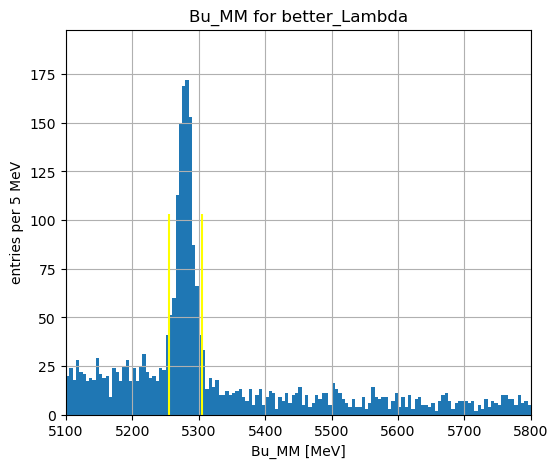

xMin, xMax =  5100.0 5800.0
bin_width =  5.0
y_vals[0:10] =  [20. 24. 18. 28. 22. 21. 17. 19. 18. 29.]
p, v, e =  n_s 968.0889337200497 34.80412251383524
p, v, e =  n_b 1407.0104030317293 40.99044689169182
p, v, e =  mu 5279.405371790128 0.4787505623147331
p, v, e =  sigma 12.489591844255063 0.4694748707002089
p, v, e =  A 0.0399701578002963 0.1750003425874716
p, v, e =  b 0.0026901151034856765 0.0001578726147429218


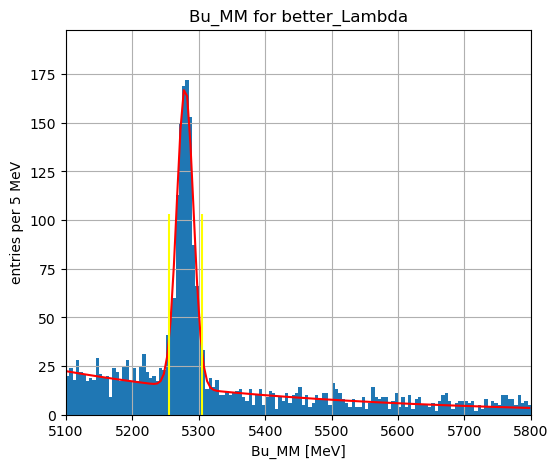

In [57]:
plt.figure()
plt.title('Bu_MM for better_Lambda')
nC_b, bins_b, patches = plt.hist(Bu_MM[better_Lambda], bins=140, range=(5100,5800))
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([5100,5800,0,1.15*max(nC_b)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC_b), colors='yellow')
plt.vlines(5305., 0., 0.6*max(nC_b), colors='yellow')
plt.show()

xMin, xMax, bin_width, x_vals, y_vals, y_errs = Fit_Setup(nC_b,bins_b)
m1 = Minuit(chi2_Gaussian_plus_Exp, n_s=init_pars[0], n_b=init_pars[1], mu=init_pars[2], sigma=init_pars[3], A=init_pars[4], b=init_pars[5])
m1.limits["b"] = (0.0000001,0.2)
m1.limits["A"] = (0.000001,0.2)
m1.limits["n_s"] = (0.0001,100000)
m1.limits["n_b"] = (0.0001,1000000)
m1.migrad()

for p, v, e in zip(m1.parameters, m1.values, m1.errors):
    print('p, v, e = ',p,v,e)

plt.figure()
plt.title('Bu_MM for better_Lambda')
nC_b, bins_b, patches = plt.hist(Bu_MM[better_Lambda], bins=140, range=(5100,5800))
mask = (0 != y_errs)
predictions = Gaussian_plus_Exp(x_vals[mask],*m1.values)
plt.plot(x_vals,predictions, 'r-', label='Fit')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([5100,5800,0,1.15*max(nC_b)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC_b), colors='yellow')
plt.vlines(5305., 0., 0.6*max(nC_b), colors='yellow')
plt.show()


In the cell below, we use a method from the vector library to create four-vectors for each of the $ B $ daughter particles (the $ \bar \:ambda $, the proton, and the two kaons.

These four-vectors are added to produce the four-vectors of two- and three-daughter combinations.

In the cell below, we use a method from the vector library to do this calculation for us and check that it gives the same result.

In [58]:
K1_4vec  = vector.awk({"x":h1_PX, "y":h1_PY, "z":h1_PZ, "t":h1_PE})
K2_4vec  = vector.awk({"x":h2_PX, "y":h2_PY, "z":h2_PZ, "t":h2_PE})
p_4vec   = vector.awk({"x":p_PX,  "y":p_PY,  "z":p_PZ,  "t":p_PE})
L0_4vec  = vector.awk({"x":L0_PX,  "y":L0_PY,  "z":L0_PZ,  "t":L0_PE})

KK_4vec  = K1_4vec+K2_4vec
pKK_4vec = p_4vec+KK_4vec 

LbarpKp_4vec = L0_4vec + p_4vec + K2_4vec  ## name is misleading (this is a Lbar,p,Km combo)

KK_mass  = np.sqrt(np.square(KK_4vec.t)  - np.square(KK_4vec.x)  - np.square(KK_4vec.y)  - np.square(KK_4vec.z))

pKK_mass = np.sqrt(np.square(pKK_4vec.t) - np.square(pKK_4vec.x) - np.square(pKK_4vec.y) - np.square(pKK_4vec.z))

LbarpKp_mass = np.sqrt(np.square(LbarpKp_4vec.t) - np.square(LbarpKp_4vec.x) - np.square(LbarpKp_4vec.y) - np.square(LbarpKp_4vec.z))

In [59]:
KK_alt_mass = KK_4vec.tau
mass_diff = KK_mass-KK_alt_mass
print('mass_diff = ',mass_diff)

mass_diff =  [0, 0, -7.96e-11, 0, 1.39e-10, ..., 0, -1.04e-10, 6.46e-11, 5.41e-11, -1.55e-09]


In the next cell we try a variation on use of the vector library.  In this case we label the elements of the four-vector as $ ( p_x, p_y, p_z, E) $ rather than $ (x, y, z, t ) $ and calculate the invariant quantity using the four_vector.m method rather than the four_vector.tau method.  

In [60]:
K1_4vec_p  = vector.awk({"px":h1_PX, "py":h1_PY, "pz":h1_PZ, "e":h1_PE})
K2_4vec_p  = vector.awk({"px":h2_PX, "py":h2_PY, "pz":h2_PZ, "e":h2_PE})

KKsum      = K1_4vec_p +  K2_4vec_p
KKsum_mass = KKsum.m

In the cell below, $ m (K^+ K^- ) $ is plotted for all events with good_Lambda candidates.

*  Make the same plot for good_Lambda & (prodProbNNx>0.5)

*  Make the same plot for good_Lambda & (prodProbNNx>0.5) & B_region

*  Make the corresponding zoomed-in plot for regions where you observe what might be interesting structure.

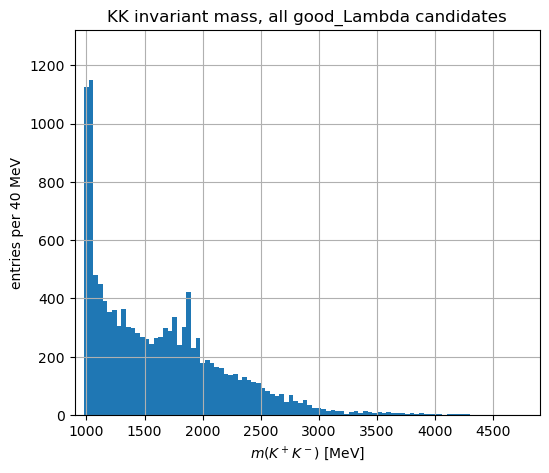

In [61]:
## the code to make the KK_Mass plot for good_Lambda events is shown below.
## add code for the other plots described above.

plt.figure()
plt.title('KK invariant mass, all good_Lambda candidates')
nC, bin, patches = plt.hist(KK_mass[good_Lambda], bins=100, range=(900.,4900.))
plt.xlabel(r'$ m(K^+ K^-) $ [MeV]')
plt.ylabel('entries per 40 MeV')
plt.axis([900.,4900.,0,1.15*max(nC)])
plt.grid(True)
plt.show()



## Lambda Fits  

In [63]:
# Use the class:
nCL, binsL, patches = plt.hist(L0_MM[good_Lambda], bins=60, range=(1100,1130))
plt.close()

# Set the initial parameter values and limits for the fit


# DoubleGaussian_plus_Exp [n_s, f, n_b, mu1, mu2, sigma1, sigma2, A, b] 
init_pars_L = [10000., 0.6, 10., 1115., 1120., 10., 15., 0.04, 0.005] ## good_Lambda


# DoubleGaussian_plus_linear [n_s, f, n_b, mu1, mu2, sigma1, sigma2, m, b]
#init_pars_B = [1000, 0.5, 300, 1113, 1115, 13.0, 15.0, 0.0001, 0.0001]

# DoubleGaussian_plust_parabola [n_s, f, n_b, mu1, mu2, sigma1, sigma2, a, b, c]
#init_pars = [2000., 0.5, 20000., 5280., 5285., 10., 15., 0.01, 0.001, 0.01]


# Gaussian_plus_Exp [n_s, n_b, mu, sigma, A, b]
#init_pars = [1000., 800., 20000., 5280., 5285., 10., 15., 0.04, 0.005]

# DoubleGaussian_plus_argus [n_s, f, n_b, mu1, mu2, sigma1, sigma2, m0, c, p]


minuit_limits_L = {
    "f": (0.0001, 0.9999),
}
fit_model_L = DoubleGaussian_plus_Exp(binsL, nCL, minuit_limits_L)

fit_result_L = fit_model_L.fit(init_pars_L)

# Print the fitted parameters
print("Fitted parameters:", fit_result_L.values)
fit_result_L

Fitted parameters: <ValueView n_s=12694.060733404227 f=0.3131439813380721 n_b=2150260.326020783 mu1=1115.714551448608 mu2=1115.9633647209641 sigma1=1.0717052661854427 sigma2=2.43344180940283 A=0.03999999134831123 b=-1.1501608239621508>


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 16.52                      │             Nfcn = 2238              │
│ EDM = 0.00247 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           ABOVE call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │        Covariance APPROXIMATE        │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ n_s    │  12.69e3  │  0.18e3   │            │            │         │         │       │
│ 1 │ f      │   0.31    │   0.06    │            │            │ 0.0001  │ 0.9999  │       │
│ 2 │ n_b    │    2e6    │    5e6    │            │            │         │         │       │
│ 3 │ mu1    │ 1.11571e3 │ 0.00004e3 │            │            │         │         │       │
│ 4 │ mu2    │ 1.11596e3 │ 0.00007e3 │            │            │         │         │       │
│ 5 │ sigma1 │   1.07    │   0.09    │            │            │         │         │       │
│ 6 │ sigma2 │   2.43    │   0.15    │            │            │         │         │       │
│ 7 │ A      │    0.0    │    1.4    │            │            │         │         │       │
│ 8 │ b      │   -1.15   │   0.34    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│        │           n_s             f           n_b           mu1           mu2        sigma1        sigma2             A             b │
├────────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    n_s │      3.19e+04        6.8460     123.966e6       -0.3497         8.201         8.900        19.841          -0.0        -19.25 │
│      f │        6.8460       0.00353  -5.1741057e3        0.0003        0.0029        0.0049        0.0084        0.0000       -0.0033 │
│    n_b │     123.966e6  -5.1741057e3      2.55e+13 -10.6330831e3   37.126085e3   -7.338209e3   27.101353e3          -0.1 -1.63512084e6 │
│    mu1 │       -0.3497        0.0003 -10.6330831e3        0.0015       -0.0008        0.0004        0.0004        0.0000        0.0012 │
│    mu2 │         8.201        0.0029   37.126085e3       -0.0008       0.00467         0.004         0.008        -0.000        -0.007 │
│ sigma1 │         8.900        0.0049   -7.338209e3        0.0004         0.004       0.00776         0.011         0.000        -0.004 │
│ sigma2 │        19.841        0.0084   27.101353e3        0.0004         0.008         0.011        0.0225        -0.000        -0.013 │
│      A │          -0.0        0.0000          -0.1        0.0000        -0.000         0.000        -0.000             2          0.00 │
│      b │        -19.25       -0.0033 -1.63512084e6        0.0012        -0.007        -0.004        -0.013          0.00         0.112 │
└────────┴───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

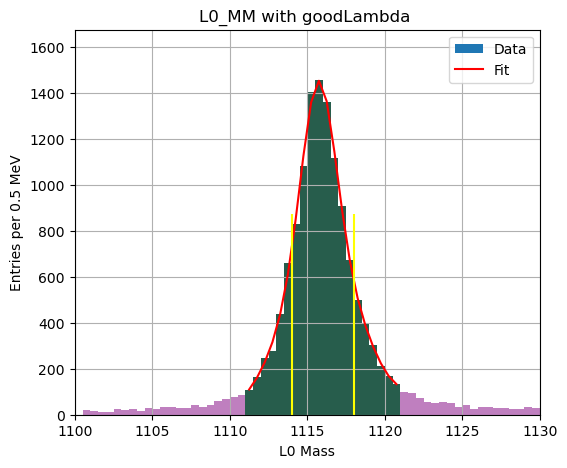

In [72]:
fig, ax = fit_model_L.plot(fit_result_L, binsL, nCL, title='L0_MM with goodLambda ', xlabel='L0 Mass', ylabel='Entries per 0.5 MeV', vlines=[1114., 1118.], show_plot=False)
ax.hist(L0_MM[temp_cut], bins=60, range=(1100, 1130), color='purple', alpha=0.5)
ax.hist(L0_MM[good_Lambda], bins=60, range=(1100, 1130), color='g', alpha=0.5)
plt.show()

In [100]:
root_name = "_LL"

# Define a dictionary to store your variables
variables = {
    "nC": None,
    "bins": None,
    "patches": None,
    "init_pars": None,
    "minuit_limits": None,
    "fit_model": None,
    "fit_result": None,
    "fig": None,
    "ax": None,
}

# Use the class:
variables["nC" + root_name], variables["bins" + root_name], variables["patches" + root_name] = plt.hist(L0_MM[good_LambdaLL], bins=60, range=(1100,1130))
plt.close()

# DoubleGaussian_plus_Exp [n_s, f, n_b, mu1, mu2, sigma1, sigma2, A, b] 
variables["init_pars" + root_name] = [1828.0599366650097, 0.4941768942938372, -22732.448819532376, 1115.813484591921, 1115.968219607668, 0.9105384655460779, 2.194006264575918, -0.04194529869310294, 1.5782139821288466] ## good_LambdaLL

variables["minuit_limits" + root_name] = {
    "f": (0.0001, 0.9999),
}

variables["fit_model" + root_name] = DoubleGaussian_plus_Exp(variables["bins" + root_name], variables["nC" + root_name], variables["minuit_limits" + root_name])

variables["fit_result" + root_name] = variables["fit_model" + root_name].fit(variables["init_pars" + root_name])

# Print the fitted parameters
print("Fitted parameters:", variables["fit_result" + root_name].values)
variables["fit_result" + root_name]



Fitted parameters: <ValueView n_s=1828.1651854448958 f=0.4941512927735356 n_b=-11131.281243220841 mu1=1115.8134987098736 mu2=1115.9681785583598 sigma1=0.9105598592925346 sigma2=2.194025821287337 A=-0.04194529869310294 b=2.0821520152202893>


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 12.54                      │              Nfcn = 525              │
│ EDM = 5.45e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│           Hesse FAILED           │       Covariance NOT pos. def.       │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ n_s    │ 1.8282e3  │ 0.0000e3  │            │            │         │         │       │
│ 1 │ f      │ 4.9415e-1 │ 0.0000e-1 │            │            │ 0.0001  │ 0.9999  │       │
│ 2 │ n_b    │ -1.1131e4 │ 0.0000e4  │            │            │         │         │       │
│ 3 │ mu1    │ 1.1158e3  │ 0.0000e3  │            │            │         │         │       │
│ 4 │ mu2    │  1.116e3  │  0.000e3  │            │            │         │         │       │
│ 5 │ sigma1 │ 9.1056e-1 │ 0.0000e-1 │            │            │         │         │       │
│ 6 │ sigma2 │   2.194   │   0.000   │            │            │         │         │       │
│ 7 │ A      │-4.1945e-2 │ 0.0000e-2 │            │            │         │         │       │
│ 8 │ b      │  2.0822   │  0.0000   │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

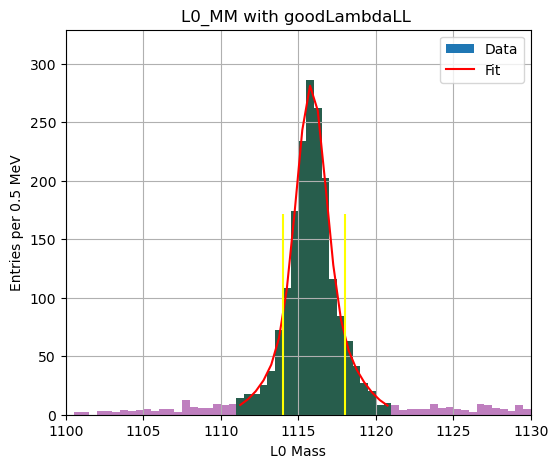

In [101]:
variables["fig" + root_name], variables["ax" + root_name] = variables["fit_model" + root_name].plot(variables["fit_result" + root_name], variables["bins" + root_name], variables["nC" + root_name], title='L0_MM with goodLambdaLL ', xlabel='L0 Mass', ylabel='Entries per 0.5 MeV', vlines=[1114., 1118.], show_plot=False)

variables["ax" + root_name].hist(L0_MM[temp_cutLL], bins=60, range=(1100, 1130), color='purple', alpha=0.5)
variables["ax" + root_name].hist(L0_MM[good_LambdaLL], bins=60, range=(1100, 1130), color='g', alpha=0.5)

plt.show()


In [106]:
root_name = "_DD"

# Define a dictionary to store your variables
variables = {
    "nC": None,
    "bins": None,
    "patches": None,
    "init_pars": None,
    "minuit_limits": None,
    "fit_model": None,
    "fit_result": None,
    "fig": None,
    "ax": None,
}

# Use the class:
variables["nC" + root_name], variables["bins" + root_name], variables["patches" + root_name] = plt.hist(L0_MM[good_LambdaDD], bins=60, range=(1100,1130))
plt.close()

# DoubleGaussian_plus_Exp [n_s, f, n_b, mu1, mu2, sigma1, sigma2, A, b] 
variables["init_pars" + root_name] = [9120.817313121128, 0.929509388491892, 6548.478148791116, 1115.7823039513255, 1499.4428273473834, 1.6580107105881836, 4.957241526156779, -0.030793060590727006, -0.050084638862231065] ## good_LambdaLL

variables["minuit_limits" + root_name] = {
    "f": (0.0001, 0.9999),
}

variables["fit_model" + root_name] = DoubleGaussian_plus_Exp(variables["bins" + root_name], variables["nC" + root_name], variables["minuit_limits" + root_name])

variables["fit_result" + root_name] = variables["fit_model" + root_name].fit(variables["init_pars" + root_name])

# Print the fitted parameters
print("Fitted parameters:", variables["fit_result" + root_name].values)
variables["fit_result" + root_name]



Fitted parameters: <ValueView n_s=9120.823962618582 f=0.9295100740340545 n_b=6548.447289763933 mu1=1115.7823071528799 mu2=1499.4428273473834 sigma1=1.6580119107070015 sigma2=4.957241526156779 A=-0.03081739997859125 b=-0.050082785578522256>


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 42.52                      │              Nfcn = 544              │
│ EDM = 2.89e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│           Hesse FAILED           │       Covariance NOT pos. def.       │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ n_s    │ 9.1208e3  │ 0.0000e3  │            │            │         │         │       │
│ 1 │ f      │ 9.2951e-1 │ 0.0000e-1 │            │            │ 0.0001  │ 0.9999  │       │
│ 2 │ n_b    │ 6.5484e3  │ 0.0000e3  │            │            │         │         │       │
│ 3 │ mu1    │ 1.1158e3  │ 0.0000e3  │            │            │         │         │       │
│ 4 │ mu2    │ 1.4994e3  │ 0.0000e3  │            │            │         │         │       │
│ 5 │ sigma1 │   1.658   │   0.000   │            │            │         │         │       │
│ 6 │ sigma2 │  4.9572   │  0.0000   │            │            │         │         │       │
│ 7 │ A      │-3.0817e-2 │ 0.0000e-2 │            │            │         │         │       │
│ 8 │ b      │-5.0083e-2 │ 0.0000e-2 │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

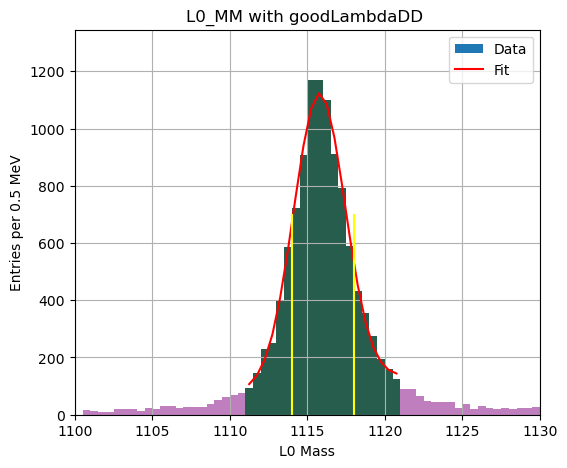

In [110]:
variables["fig" + root_name], variables["ax" + root_name] = variables["fit_model" + root_name].plot(variables["fit_result" + root_name], variables["bins" + root_name], variables["nC" + root_name], title='L0_MM with goodLambdaDD ', xlabel='L0 Mass', ylabel='Entries per 0.5 MeV', vlines=[1114., 1118.], show_plot=False)

variables["ax" + root_name].hist(L0_MM[temp_cutDD], bins=60, range=(1100, 1130), color='purple', alpha=0.5)
variables["ax" + root_name].hist(L0_MM[good_LambdaDD], bins=60, range=(1100, 1130), color='g', alpha=0.5)

plt.show()


## Random search using RandomSearch class

In [105]:
root_name = "_DD"

# Define a dictionary to store your variables
variables = {
    "nC": None,
    "bins": None,
    "patches": None,
    "param_ranges": None,
    "random_search": None,
    "best_score": None,
    "best_params": None,
    "best_fit": None,
    "best_fit_m": None,
    "parsed_output": None,
}

# Use the class:
variables["nC" + root_name], variables["bins" + root_name], variables["patches" + root_name] = plt.hist(L0_MM[good_LambdaDD], bins=60, range=(1100,1130))
plt.close()

variables["param_ranges" + root_name] = {
    "n_s": (1000, 10000),
    "f": (0.001, 0.999),
    "n_b": (10, 100),
    "mu1": (1110, 1116),
    "mu2": (1110, 1116),
    "sigma1": (10, 20),
    "sigma2": (10, 20),
    "A": (-0.1, 0.1),
    "b": (-1, 1),
}

variables["random_search" + root_name] = RandomSearch(variables["bins" + root_name], variables["nC" + root_name], fit_class=DoubleGaussian_plus_Exp, search_ranges=variables["param_ranges" + root_name], num_searches=100)

# Perform the search
variables["best_score" + root_name], variables["best_params" + root_name], variables["best_fit" + root_name] = variables["random_search" + root_name].perform_search()

# Print the results
print("Best chi2:", variables["best_score" + root_name])
print("Best initial parameters:", variables["best_params" + root_name])

# Fit the best_fit with the best_params
best_params_list = [variables["best_params" + root_name][param] for param in ["n_s", "f", "n_b", "mu1", "mu2", "sigma1", "sigma2", "A", "b"]]
variables["best_fit_m" + root_name] = variables["best_fit" + root_name].fit(best_params_list)


# Print the fitted parameters in a nice format to copy-paste
variables["parsed_output" + root_name] = parse_best_fit_parameters(variables["best_fit_m" + root_name].values)
print(variables["parsed_output" + root_name])


Best chi2: 6008.492252860698
Best initial parameters: {'n_s': 8742.96207726173, 'f': 0.9218506277007182, 'n_b': 31.944906052007564, 'mu1': 1114.9748574235894, 'mu2': 1114.774588200314, 'sigma1': 10.701667026262085, 'sigma2': 17.16250950292823, 'A': -0.030793499545673148, 'b': -0.14108629067605083}
9120.817313121128, 0.929509388491892, 6548.478148791116, 1115.7823039513255, 1499.4428273473834, 1.6580107105881836, 4.957241526156779, -0.030793060590727006, -0.050084638862231065>
